<div align="center" style="background-color:#4CAF50; padding: 20px;">
    <h1 style="color:#0056d;">✈️ Flight Price Prediction ✈️</h1>
</div>


## Name: Saliya Bano Sheikh

## Project ID: PRCP-1025-FlightPricePrediction

## Batch ID: certified Data Science

## Batch ID: 27-Mar-CDS-PUN

## Team ID: PTID-CDS-AUG-23-1633

# Pre-Data Analysis Report

## Project: Flight Fare Prediction

### Problem Statement
Flight ticket prices are known to be unpredictable, making it challenging for travelers to plan their journeys. In this project, we aim to leverage machine learning techniques to predict future flight ticket prices. This will assist both airlines in setting competitive prices and travelers in planning their trips effectively.

### Objectives
1. Conduct exploratory data analysis (EDA) to understand the dataset.
2. Clean and preprocess the data for modeling.
3. Select and train predictive models.
4. Evaluate model performance and select the best model for production.

### Data Source

Data Link : https://d3ilbtxij3aepc.cloudfront.net/projects/CDS-Capstone-Projects/flight-fare.zip


The dataset for this project consists of historical flight ticket prices and relevant features. It includes the following columns:
- `Airline`: The airline operating the flight.
- `Date_of_Journey`: The date of the flight journey.
- `Source`: The departure location.
- `Destination`: The arrival location.
- `Route`: The route taken by the flight.
- `Duration`: The duration of the flight.
- `Total_Stops`: The number of stops during the journey.
- `Additional_Info`: Additional information about the flight.
- `Price`: The target variable, representing the flight ticket price.

### Data Exploration
Before diving into data analysis, we will perform the following data exploration tasks:
- Check for missing values and handle them.
- Identify outliers and determine if they need to be addressed.
- Visualize data distributions and correlations.

### Data Preprocessing
Data preprocessing steps will include:
- Handling missing values by imputation or removal.
- Encoding categorical variables.
- Feature engineering to extract relevant information.
- Splitting the data into training and testing sets.

### Model Selection
We will consider several regression models, including but not limited to:
- Linear Regression
- Random Forest Regressor
- Gradient Boosting Regressor

### Model Evaluation
The performance of each model will be assessed using metrics such as Mean Absolute Error (MAE), Mean Squared Error (MSE), and Root Mean Squared Error (RMSE). The model with the best performance on the test set will be chosen for production.

### Next Steps
The next steps in this project will involve conducting the actual data analysis, feature engineering, model training, and evaluation. We will also create a model comparison report and document any challenges faced during the project.

Let's proceed with the data analysis phase.

---

### Importing labraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')

### Importing the dataset

In [23]:
data = pd.read_excel('Flight_Fare.xlsx')

In [26]:
# checking the top five data using head
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [9]:
# Checking the bottom five data using tail 
data.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648
10682,Air India,9/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,10:55,19:15,8h 20m,2 stops,No info,11753


In [10]:
#  Checking the randomly five data using sample
data.sample(5)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
3222,Jet Airways,12/05/2019,Kolkata,Banglore,CCU → DEL → BLR,17:00,23:35,6h 35m,1 stop,No info,14151
3656,Air India,21/05/2019,Kolkata,Banglore,CCU → BOM → BLR,09:25,21:50,12h 25m,1 stop,No info,8366
8078,Air India,3/06/2019,Delhi,Cochin,DEL → BLR → COK,09:45,23:00,13h 15m,1 stop,No info,8907
9419,Multiple carriers,18/05/2019,Delhi,Cochin,DEL → BOM → COK,10:20,19:00,8h 40m,1 stop,No info,9794
6542,Jet Airways,1/04/2019,Kolkata,Banglore,CCU → BOM → BLR,16:30,18:15 02 Apr,25h 45m,1 stop,In-flight meal not included,7064


In [6]:
data.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [7]:
#  Checking the non-null vlaues
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


Column "Route": It has 10682 non-null entries, which means there is 1 missing value in this column.


Column "Total_Stops": It also has 10682 non-null entries, indicating 1 missing value.

## Domain Analysis

1. Airline: This column likely contains the name or code of the airline providing the flight service. Airlines are a
            crucial factor in flight selection for passengers.
    <br>

2. Date_of_Journey: This column contains the date when the journey is scheduled to take place. The date of travel is vital 
                    for booking flights and planning itineraries.
    <br>

3. Source: This column likely indicates the departure city  ('Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai) or airport from where the flight originates. It's important for 
           travelers to know the starting point of their journey.
    <br>

4. Destination: This column likely indicates the arrival city ('New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad') or airport where the flight is heading. It's crucial for 
                passengers to know the final destination.
    <br>

5. Route: This column may provide information about the flight path, including any layovers or stops along the way. 
          Passengers may consider the route when choosing a flight.
    <br>

6. Dep_Time: This column indicates the departure time of the flight. Knowing the departure time is essential for travelers 
             to plan their schedules and reach the airport on time.
    <br>

7. Arrival_Time: This column shows the estimated arrival time at the destination. Passengers use this information to plan 
                 their transportation from the airport to their final destination.
    <br>

8. Duration: This column likely represents the duration of the flight, i.e., the time it takes to travel from the source to
             the destination. This information helps passengers choose flights that fit their time constraints.<br>

9. Total_Stops: This column may specify the number of stops or layovers during the journey. Non-stop flights are generally 
                preferred for their shorter travel times.
 <br>

10. Additional_Info: This column could contain supplementary information about the flight, such as special services, 
                     conditions, or remarks. It can provide additional context for travelers.
    <br>

11. Price: This column most likely displays the ticket price for the flight. Pricing is a significant factor for travelers
    when making their booking decisions.

## Exploratary Data Analysis

### Univariate analysis

In [6]:
import sweetviz as sv
report = sv.analyze(data)
report.show_html("data1.html")  

                                             |                                             | [  0%]   00:00 ->…

Report data1.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


## Insights

Airline Preference: Approximately 36% of passengers displayed a preference for Jet Airways, while Jet Airways Business received the least preference among travelers.

Date of Travel: The data suggests that the majority of people tend to travel during the months of May and June.

Source Location: Delhi emerges as the most frequented departure point for travelers, whereas Chennai sees the lowest number of departures.

Destination: The city of Cochin ranks highest in terms of destination preference, with an average selection rate of 43%, while Kolkata is the least preferred destination, with a mere 4% selection rate.

Preferred Route: The route from Delhi to Bombay (Mumbai) to Cochin (DEL-BOM-COK) stands out as the most favored route, chosen by an average of 23% of travelers. Routes with 4 or 5 stops are the least preferred.

Departure Time:

Arrival Time:

Flight Duration: Passengers typically favor flights with the shortest duration.

Total Stops: Only 37% of flights offer non-stop travel options, with the majority providing one-stop connections. There is only one flight with 4 stops.

Additional Information: Most flights do not provide additional information, and approximately 18% of flights do not offer in-flight meals. Around 3% of flights do not include check-in baggage.

Price Range: The majority of flight prices fall below 20,000 units of currency, while some flights are priced above 40,000 units.

## Bivariate Analysis

### Airline V/s Price

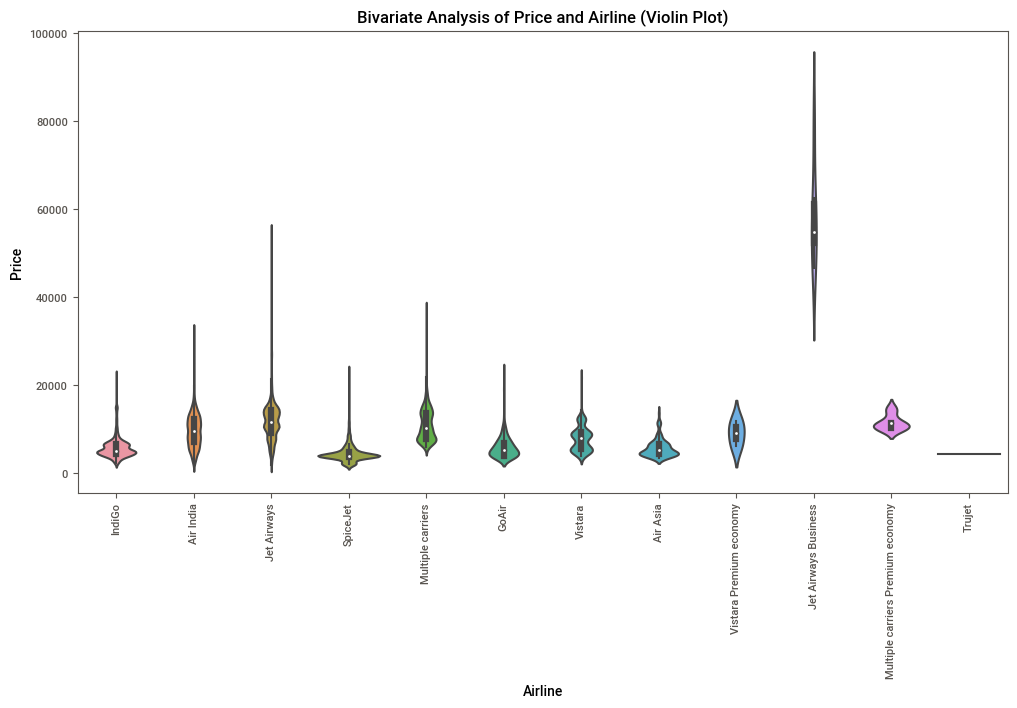

In [7]:
# Create a violin plot to analyze the relationship between 'Price' and 'Airline'
plt.figure(figsize=(12, 6))
sns.violinplot(x='Airline', y='Price', data=data)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.xlabel('Airline')
plt.ylabel('Price')
plt.title('Bivariate Analysis of Price and Airline (Violin Plot)')
plt.show()


###  Insights 

The peak cost associated with Jet Airways Business class.
Trujet maintains a fixed pricing structure.
The minimum fare applicable to Vistara Premium Economy.

### Date_of_Journey V/s Price

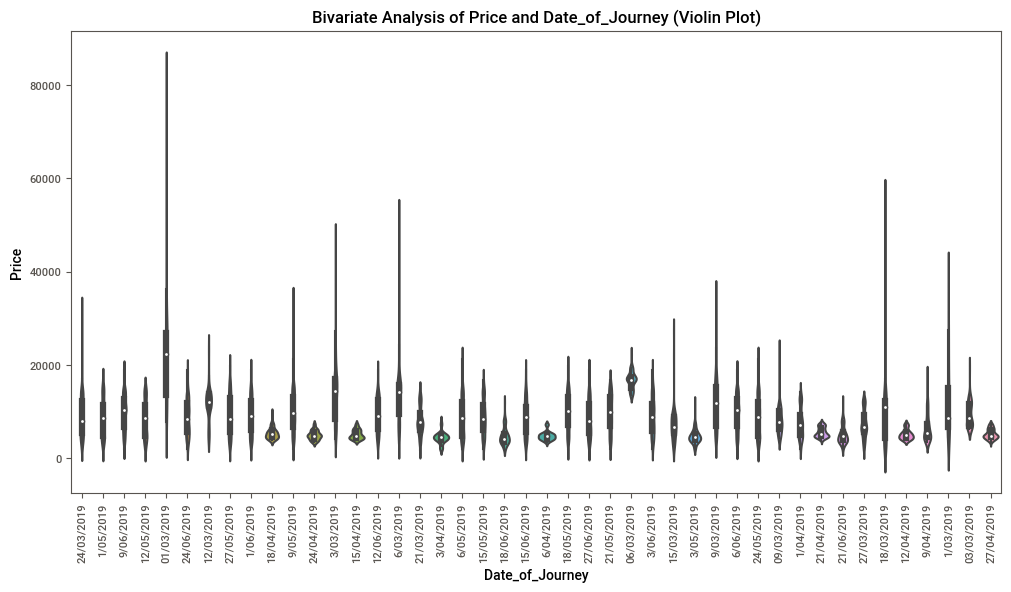

In [8]:
plt.figure(figsize=(12, 6))
sns.violinplot(x='Date_of_Journey', y='Price', data=data)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.xlabel('Date_of_Journey')
plt.ylabel('Price')
plt.title('Bivariate Analysis of Price and Date_of_Journey (Violin Plot)')
plt.show()


### Insights 

The majority of individuals opt for travel during the month of 1/03/2019, where prices typically around 80,000 units of currency.


April stands out as a month with comparatively lower travel cost.

### Source V/s Price

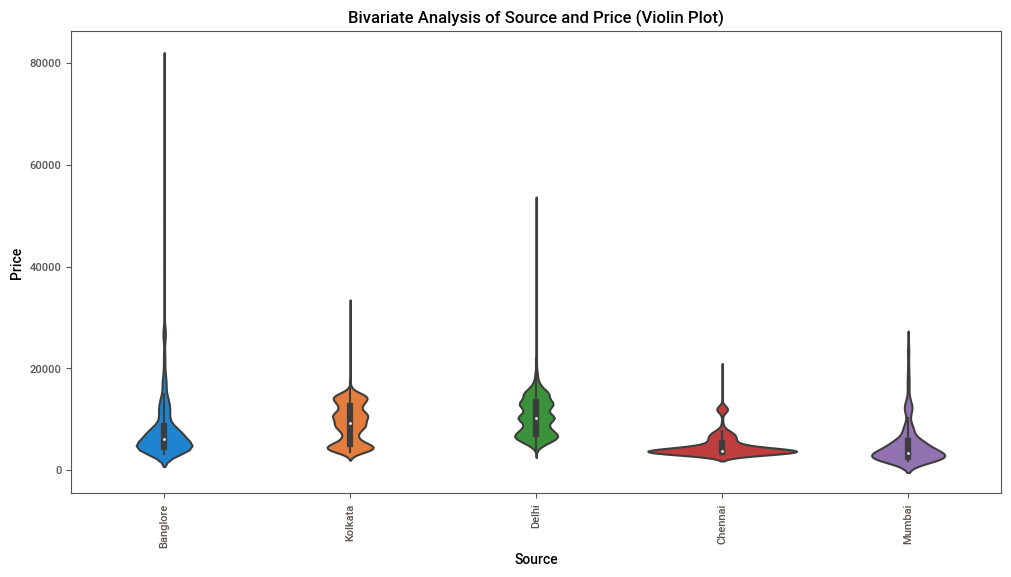

In [9]:
plt.figure(figsize=(12, 6))
sns.violinplot(x='Source', y='Price', data=data)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.xlabel('Source')
plt.ylabel('Price')
plt.title('Bivariate Analysis of Source and Price (Violin Plot)')
plt.show()


### Insights
The highest recorded price in Bangalore exceeds 80,000 units, with the second highest price observed in Delhi,
exceeding 40,000 units. Conversely, Chennai features the most affordable fares, with prices falling below 20,000 units.

chennai has relatively lower traveling price compare to other sources.

### Destination V/s Price

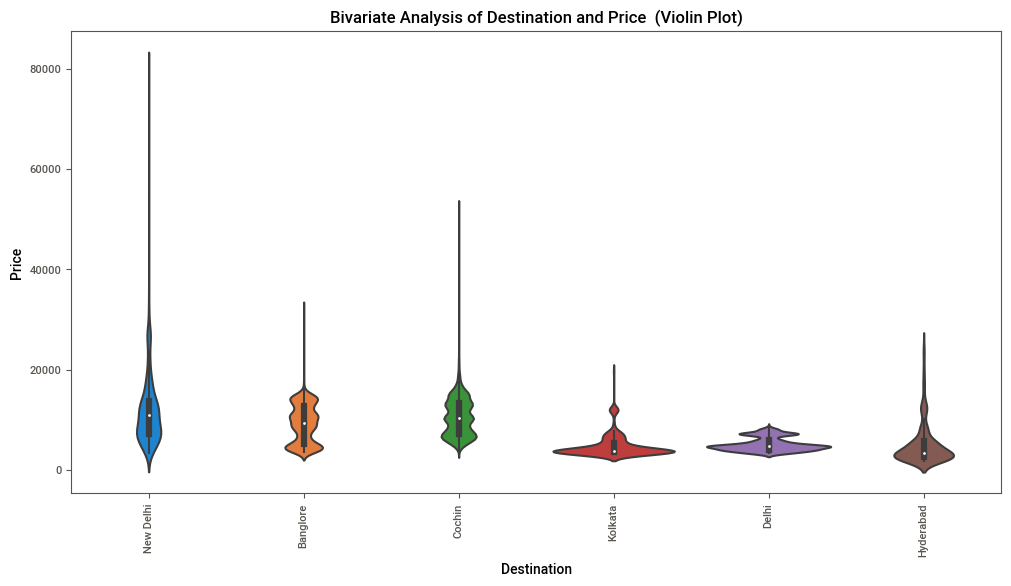

In [10]:
plt.figure(figsize=(12, 6))
sns.violinplot(x='Destination', y='Price', data=data)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.xlabel('Destination')
plt.ylabel('Price')
plt.title('Bivariate Analysis of Destination and Price  (Violin Plot)')
plt.show()


### Insights 

The majority of the highest-priced flights departing from New Delhi are priced at approximately 80,000 units of currency,
while flights to Cochin represent the second-highest price category, with fares typically below 60,000 units. 

Conversely, the avarage-priced flights originating for all Desitnation are generally priced below 20,000 units of currency amd for Kolkata, Delhi and Hyderabad flight fare is slightly lower that other destination.

### Rute V/s Price

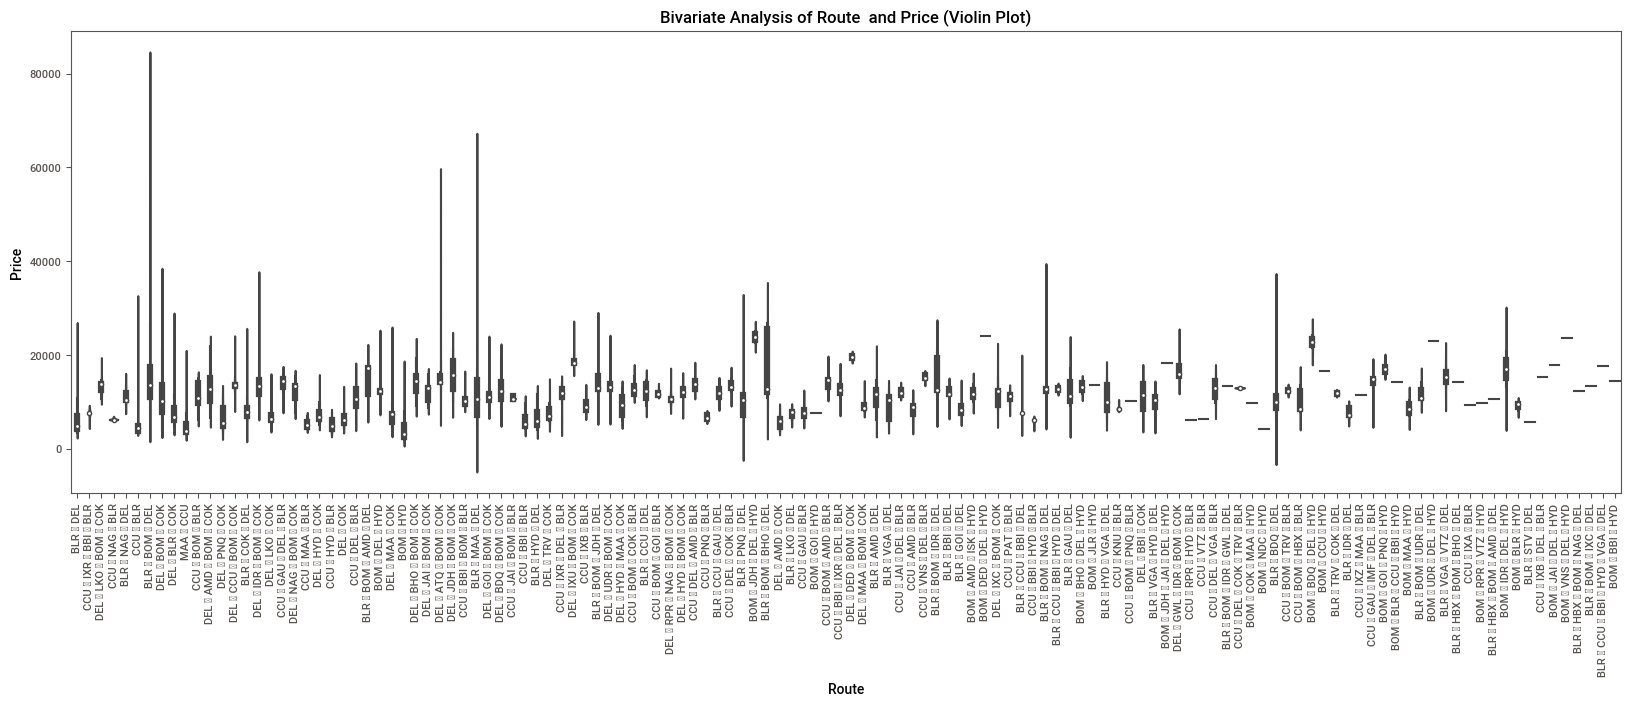

In [11]:
plt.figure(figsize=(20, 6))
sns.violinplot(x='Route', y='Price', data=data)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.xlabel('Route')
plt.ylabel('Price')
plt.title('Bivariate Analysis of Route  and Price (Violin Plot)')
plt.show()

### Insights

Avg pice for all the roputes are below 40000 but sone of the routes are higher in price like (BLR-BOM-DEL).

### Dep-Time V/s Price

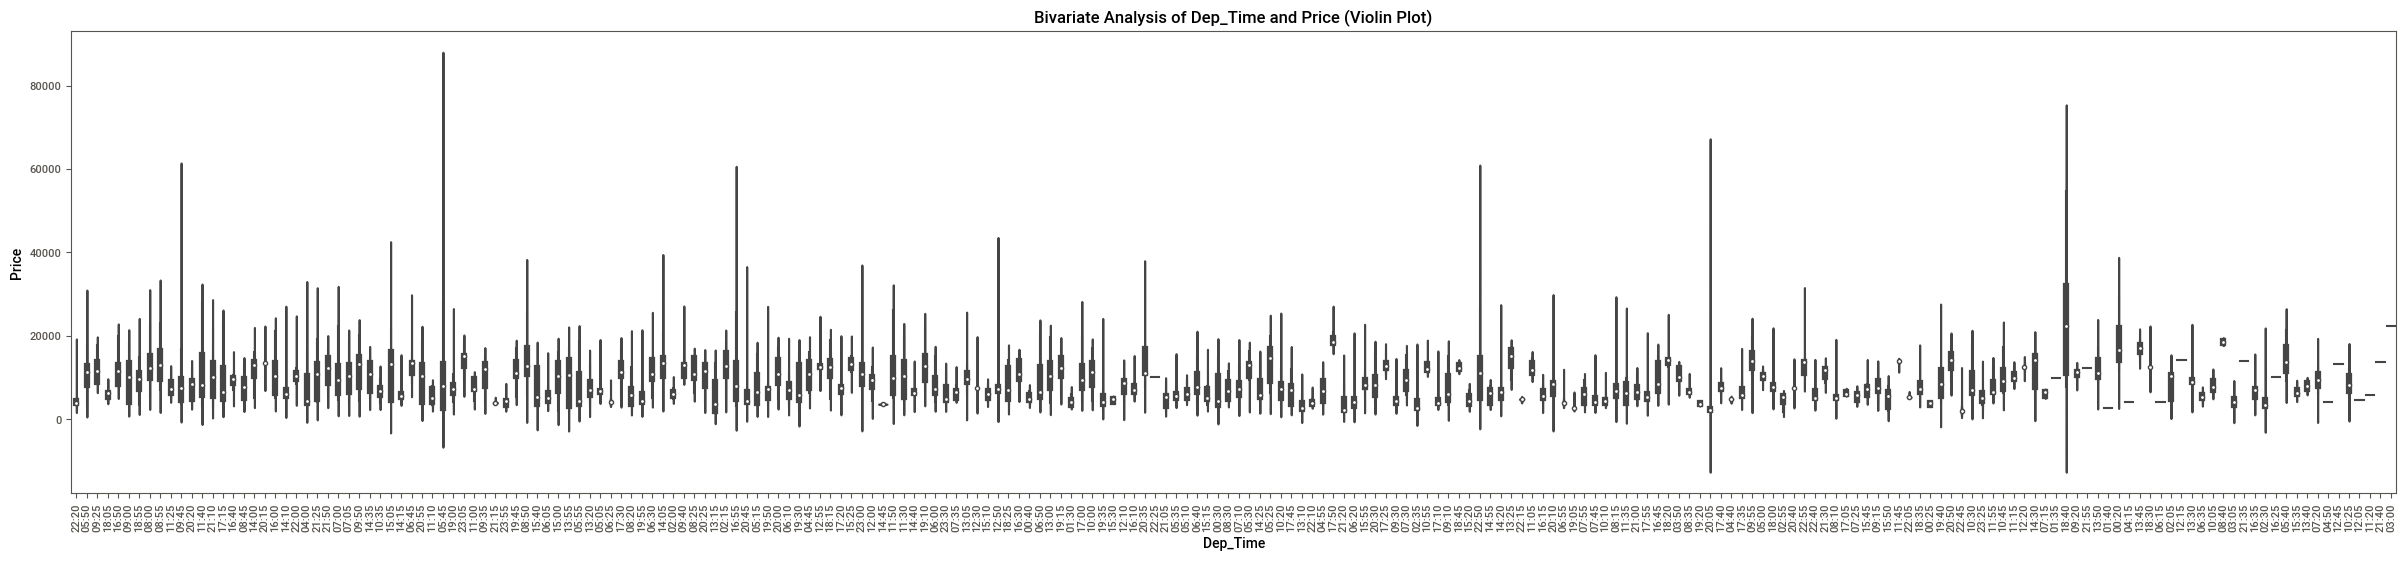

In [13]:
plt.figure(figsize=(30, 6))
sns.violinplot(x='Dep_Time', y='Price', data=data)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.xlabel('Dep_Time')
plt.ylabel('Price')
plt.title('Bivariate Analysis of Dep_Time and Price (Violin Plot)')
plt.show()

### Insights 

Dep-Time seems to be not much affecting the price but in some cases prices are too high for morning and evening flights 

### Total_Stops V/s Price

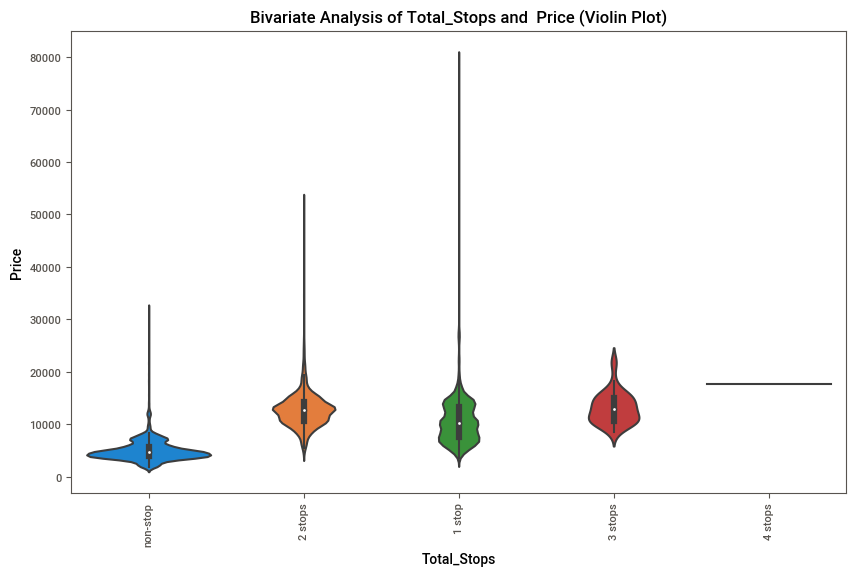

In [15]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='Total_Stops', y='Price', data=data)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.xlabel('Total_Stops')
plt.ylabel('Price')
plt.title('Bivariate Analysis of Total_Stops and  Price (Violin Plot)')
plt.show()

### Insights 


Multiple-flight itineraries with one stop tend to have higher price points, often in the vicinity of 80,000 units of 
currency. 

In contrast, non-stop flights typically fall within the avarage price range of below 10,000 to maximum upto 40,000 units of currency.

### Airline and Source

In [33]:
city_counts = data['Source'].value_counts()

# Display the number of flights for each city
print(city_counts)


Delhi       4537
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64


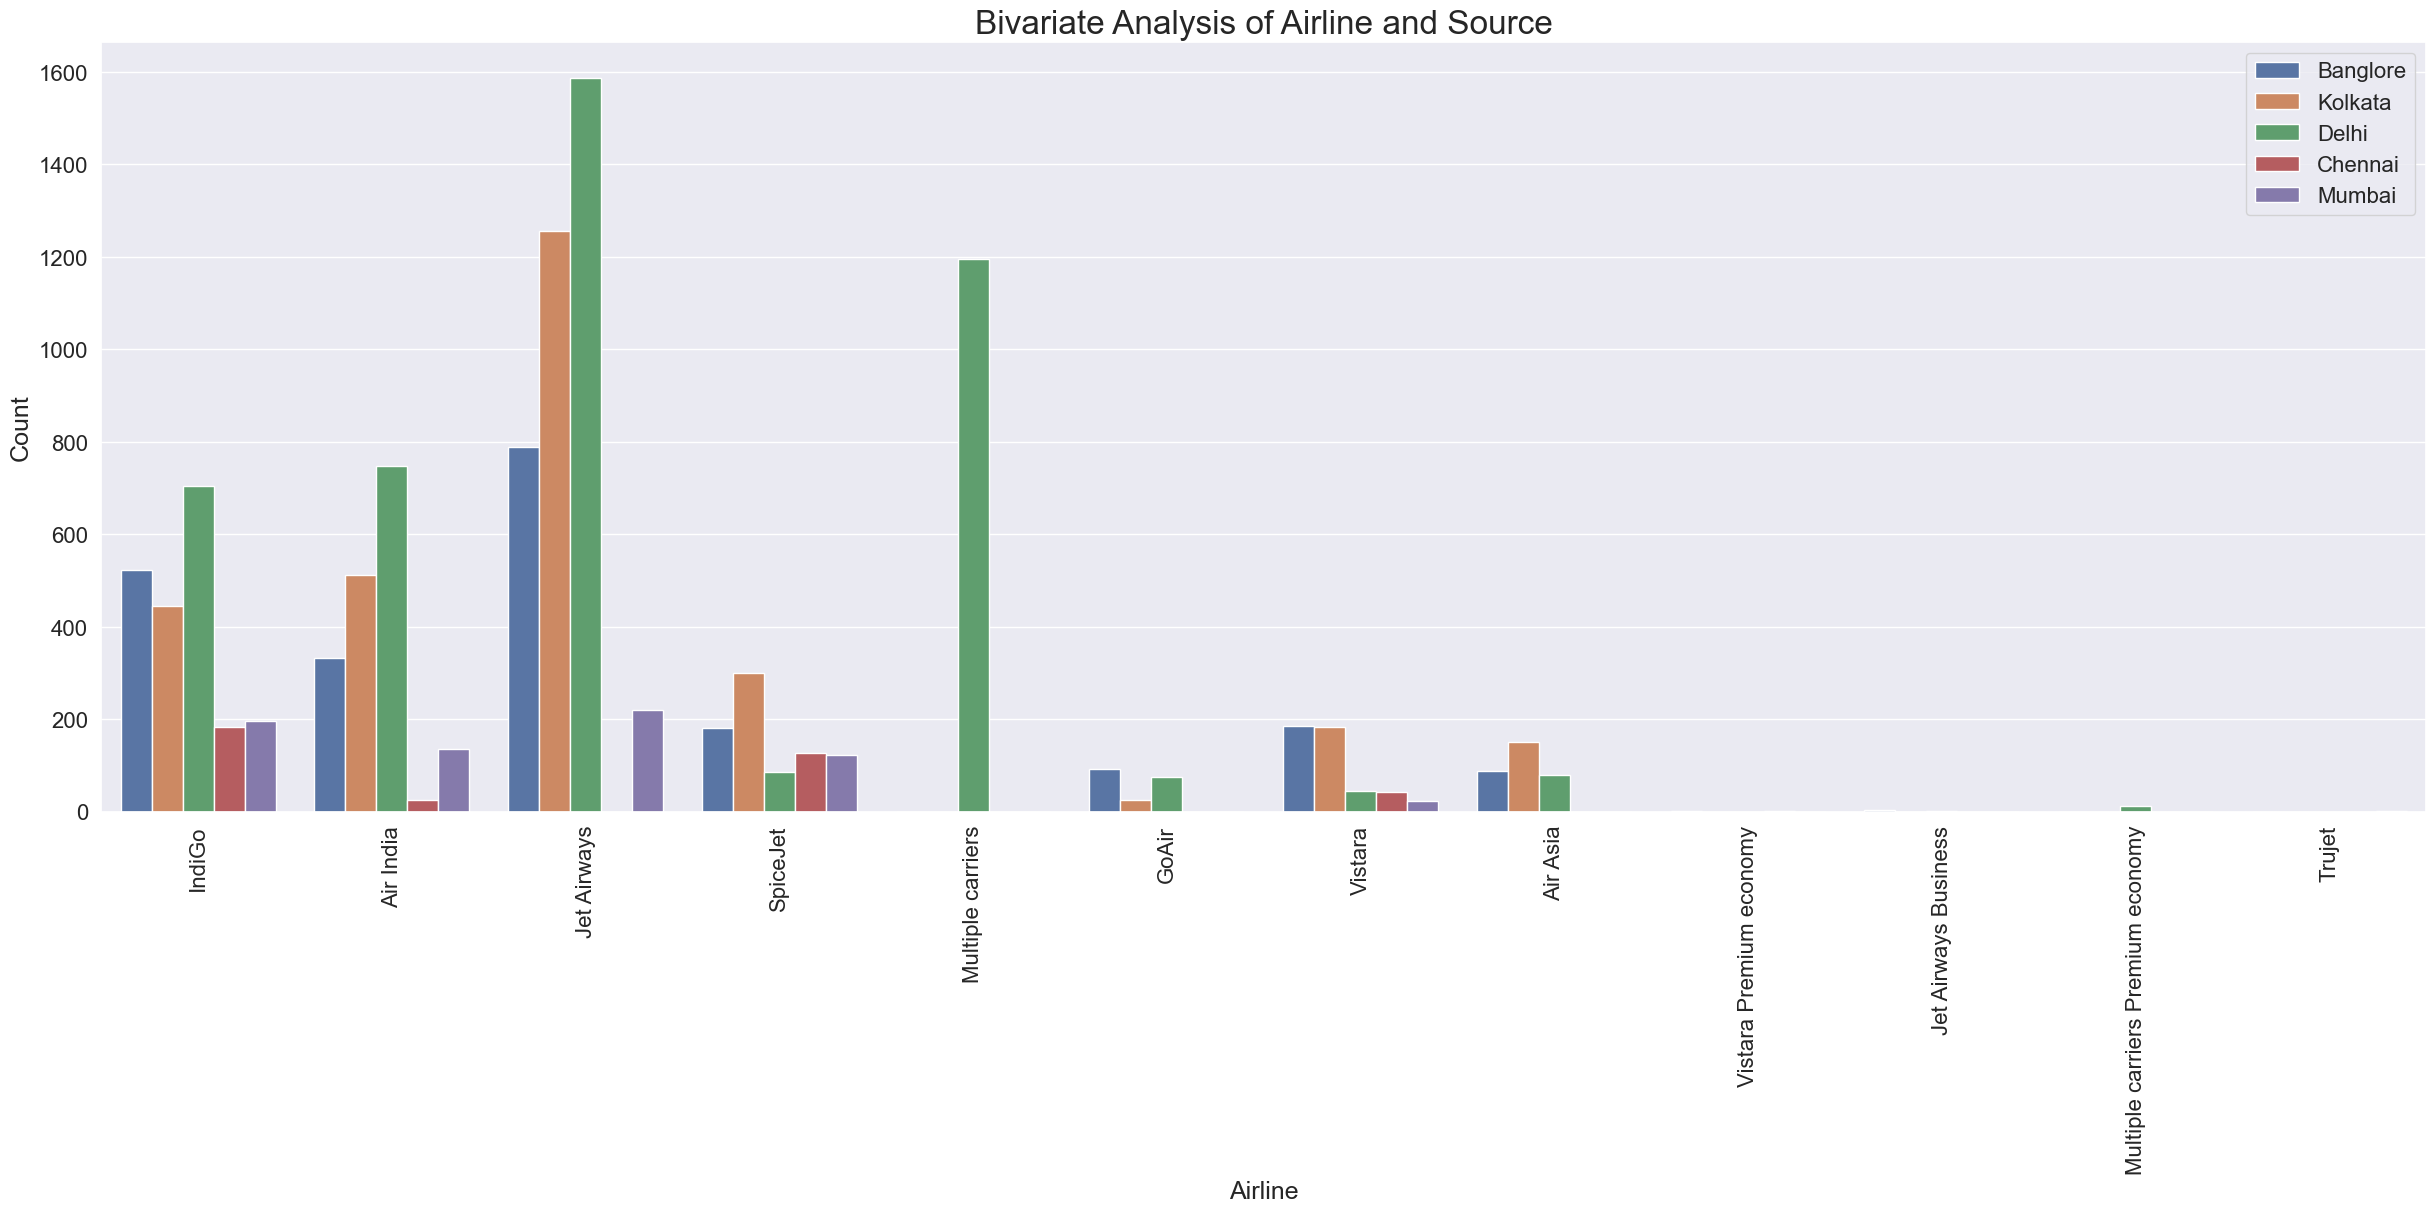

In [30]:
plt.figure(figsize=(30, 10), facecolor='white')

sns.set(font_scale=2)  # Set the font scale to increase text size

sns.countplot(x=data['Airline'], hue=data['Source'])
plt.title('Bivariate Analysis of Airline and Source', fontsize=24)  # Increase title font size
plt.xlabel('Airline', fontsize=18)  # Increase x-axis label font size
plt.ylabel('Count', fontsize=18)
# Increase y-axis label font size
plt.xticks(fontsize=16)  # Increase x-axis tick label font size
plt.yticks(fontsize=16)  # Increase y-axis tick label font size
plt.legend(fontsize=16)  # Increase legend font size

plt.show()


### Insights

jet airways provide highest number of flights to Delhi which is aproximetly 1600

Delhi ranks as the city with the highest number of flight offerings, exceeding 45000 flights.

Additionally, Indigo and air india stands out for providing flights for all the sources 

Multiple carriers provide flights only for Delhi 






### Airline V/s Destination

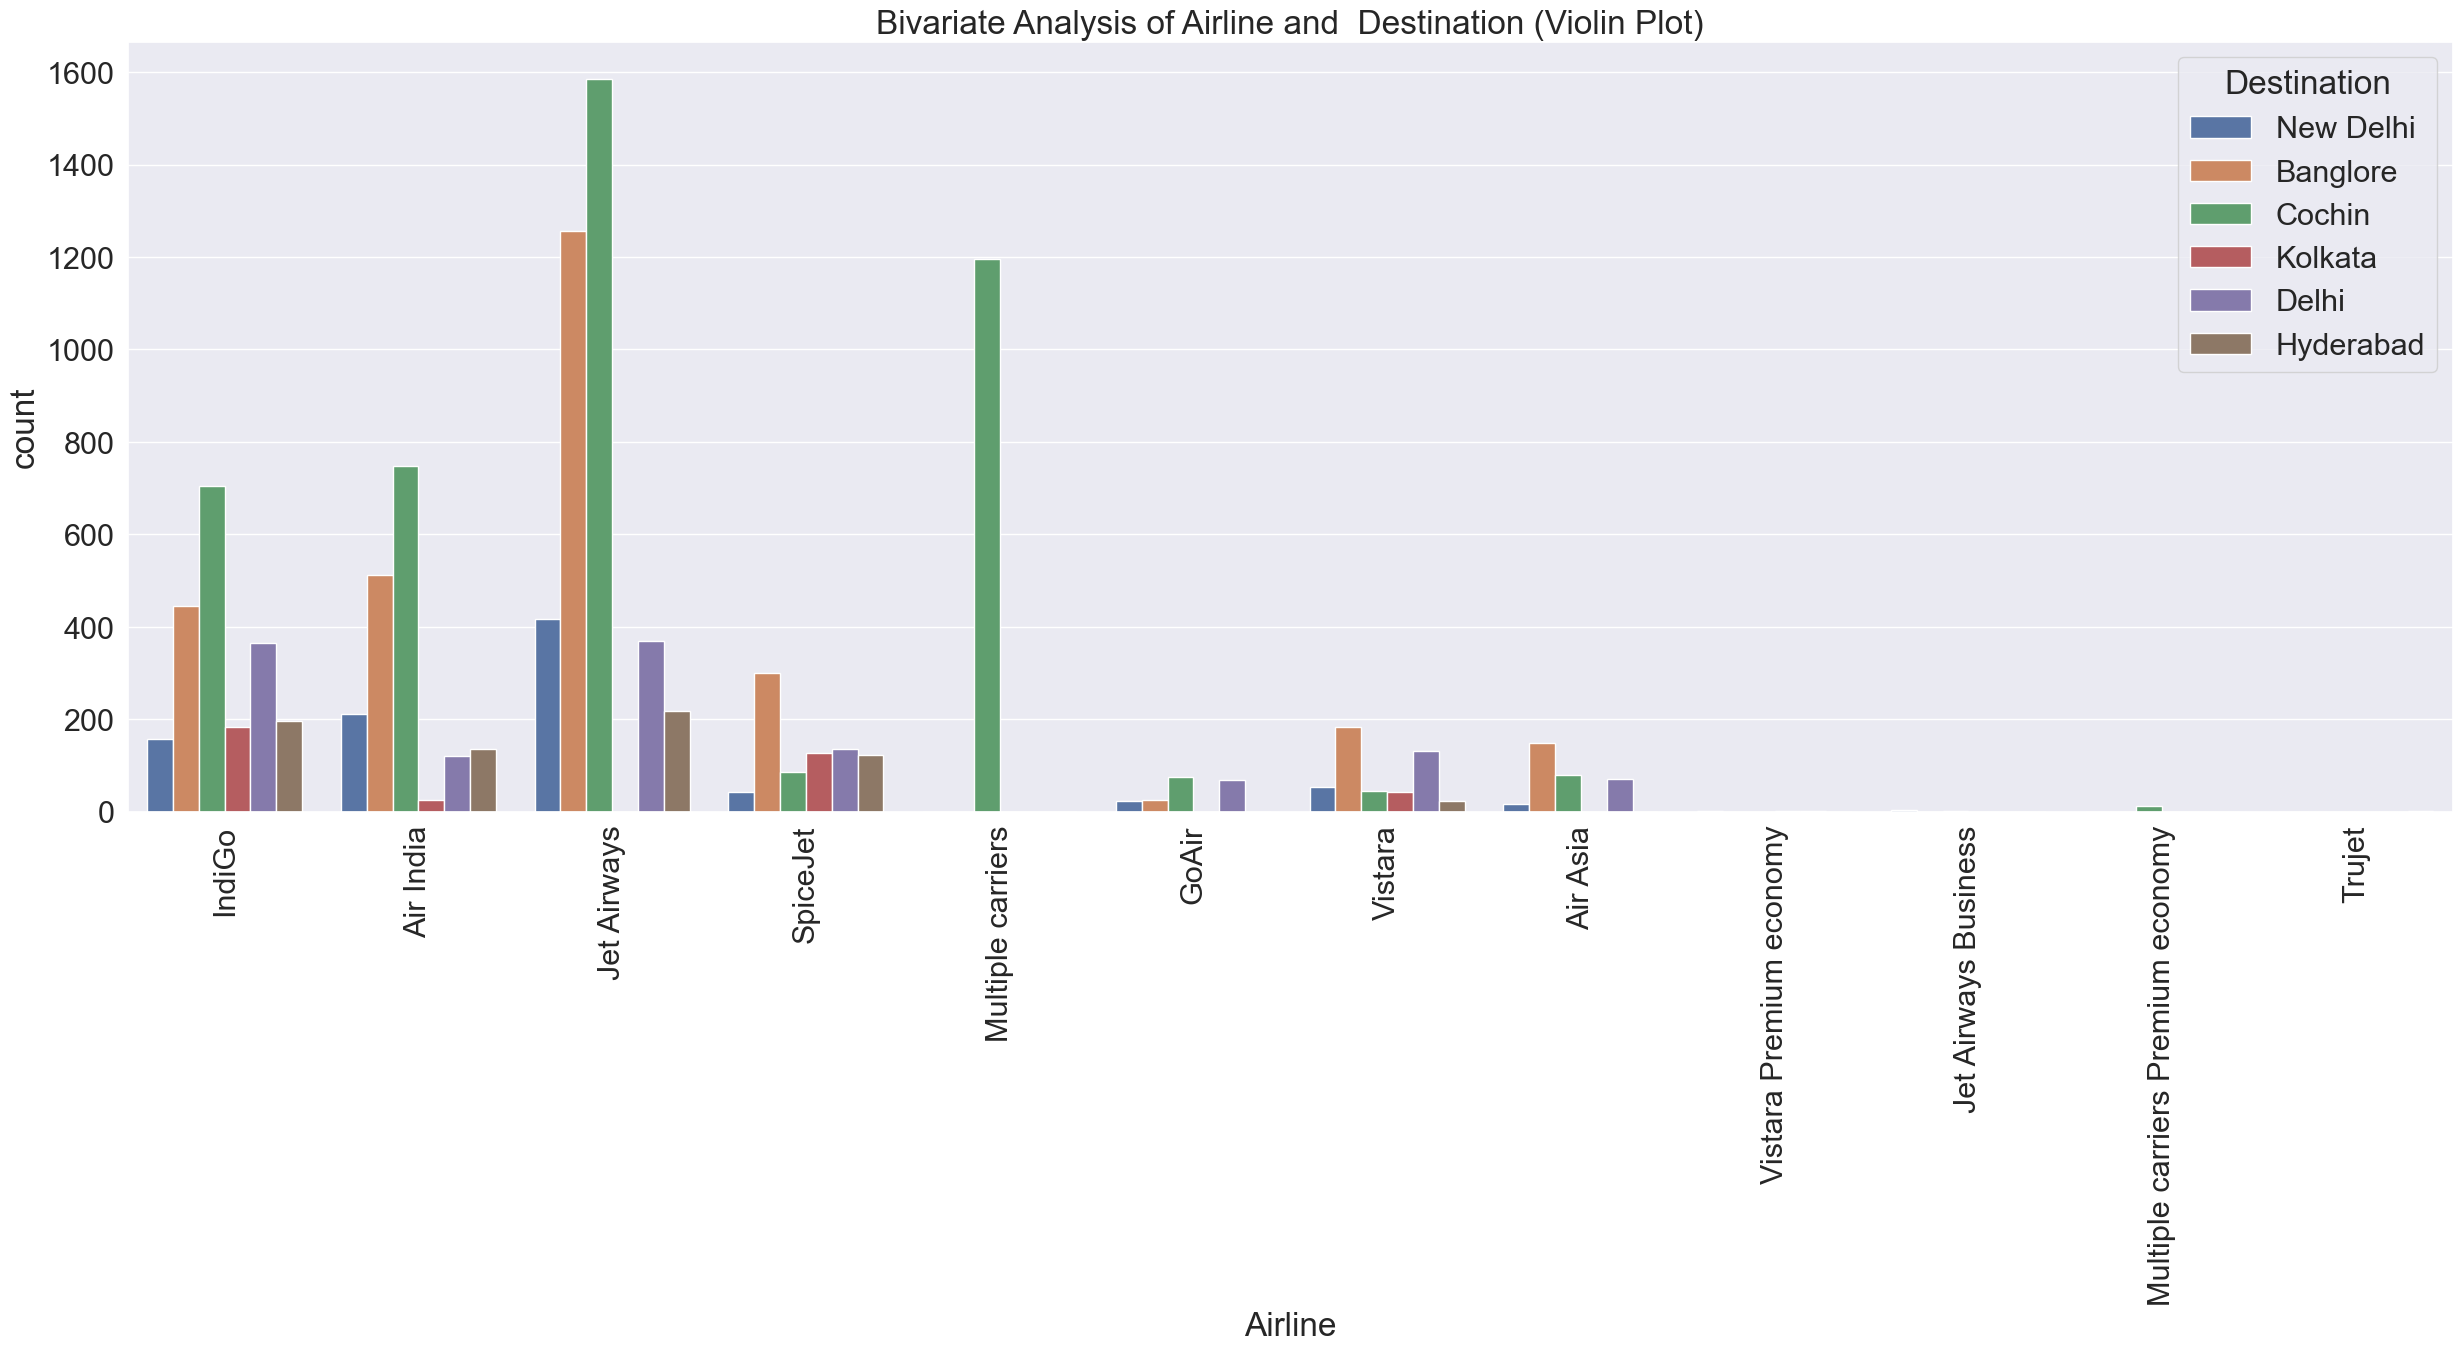

In [35]:
plt.figure(figsize=(30,10), facecolor='white')#canvas size

sns.countplot(x=data.Airline,hue=data.Destination)
plt.title('Bivariate Analysis of Airline and  Destination (Violin Plot)')
plt.xticks(rotation=90)

plt.show()

### Insights

The majority of flight services offer Cochin as a destination, with several multiple carriers also catering exclusively to this particular city.

Conversely, GoAir flights to Cochin, New Delhi, Delhi, and Bangalore are notably less frequently available among the flight offerings.


### Airlie V/s Total_Stops

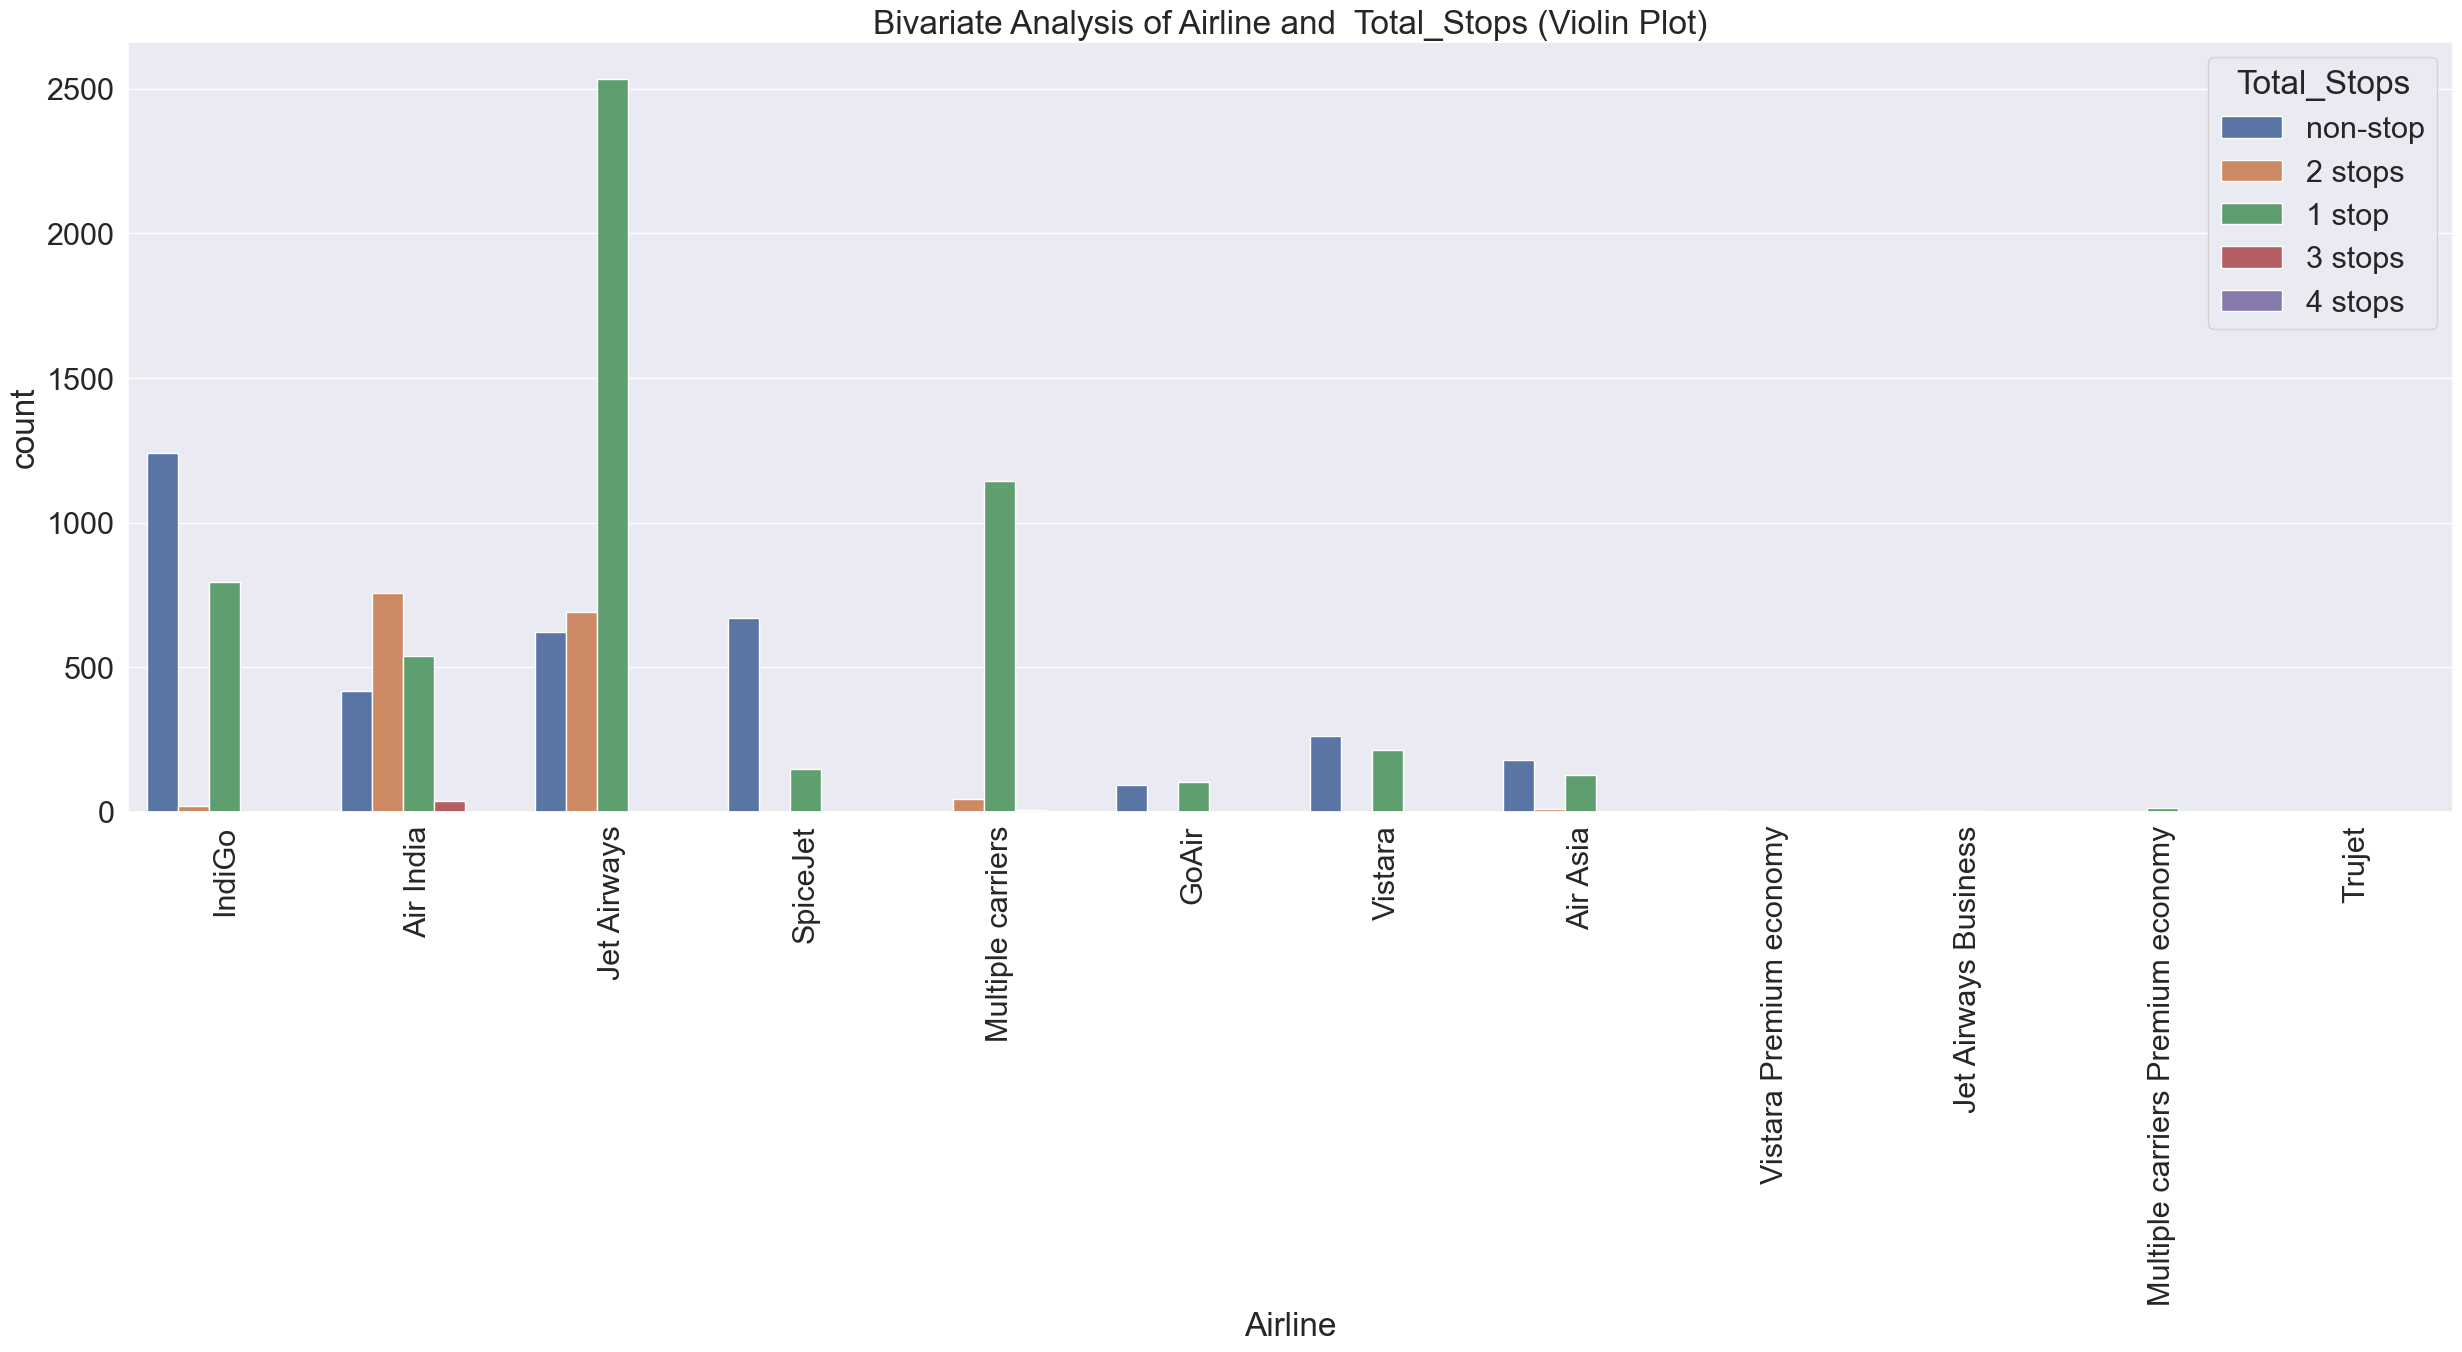

In [36]:
plt.figure(figsize=(30,10), facecolor='white')#canvas size

sns.countplot(x=data.Airline,hue=data.Total_Stops)
plt.title('Bivariate Analysis of Airline and  Total_Stops (Violin Plot)')
plt.xticks(rotation=90)
plt.show()

### Insights 

The majority of flight services are offered by Jet Airways and Indigo, both predominantly offering one-stop flights.

Indigo stands out as the primary provider of non-stop flights, while Go Air is the least frequently selected option, 
offering both one-stop and non-stop flights infrequently.

### Airline V/s Addtional_Info

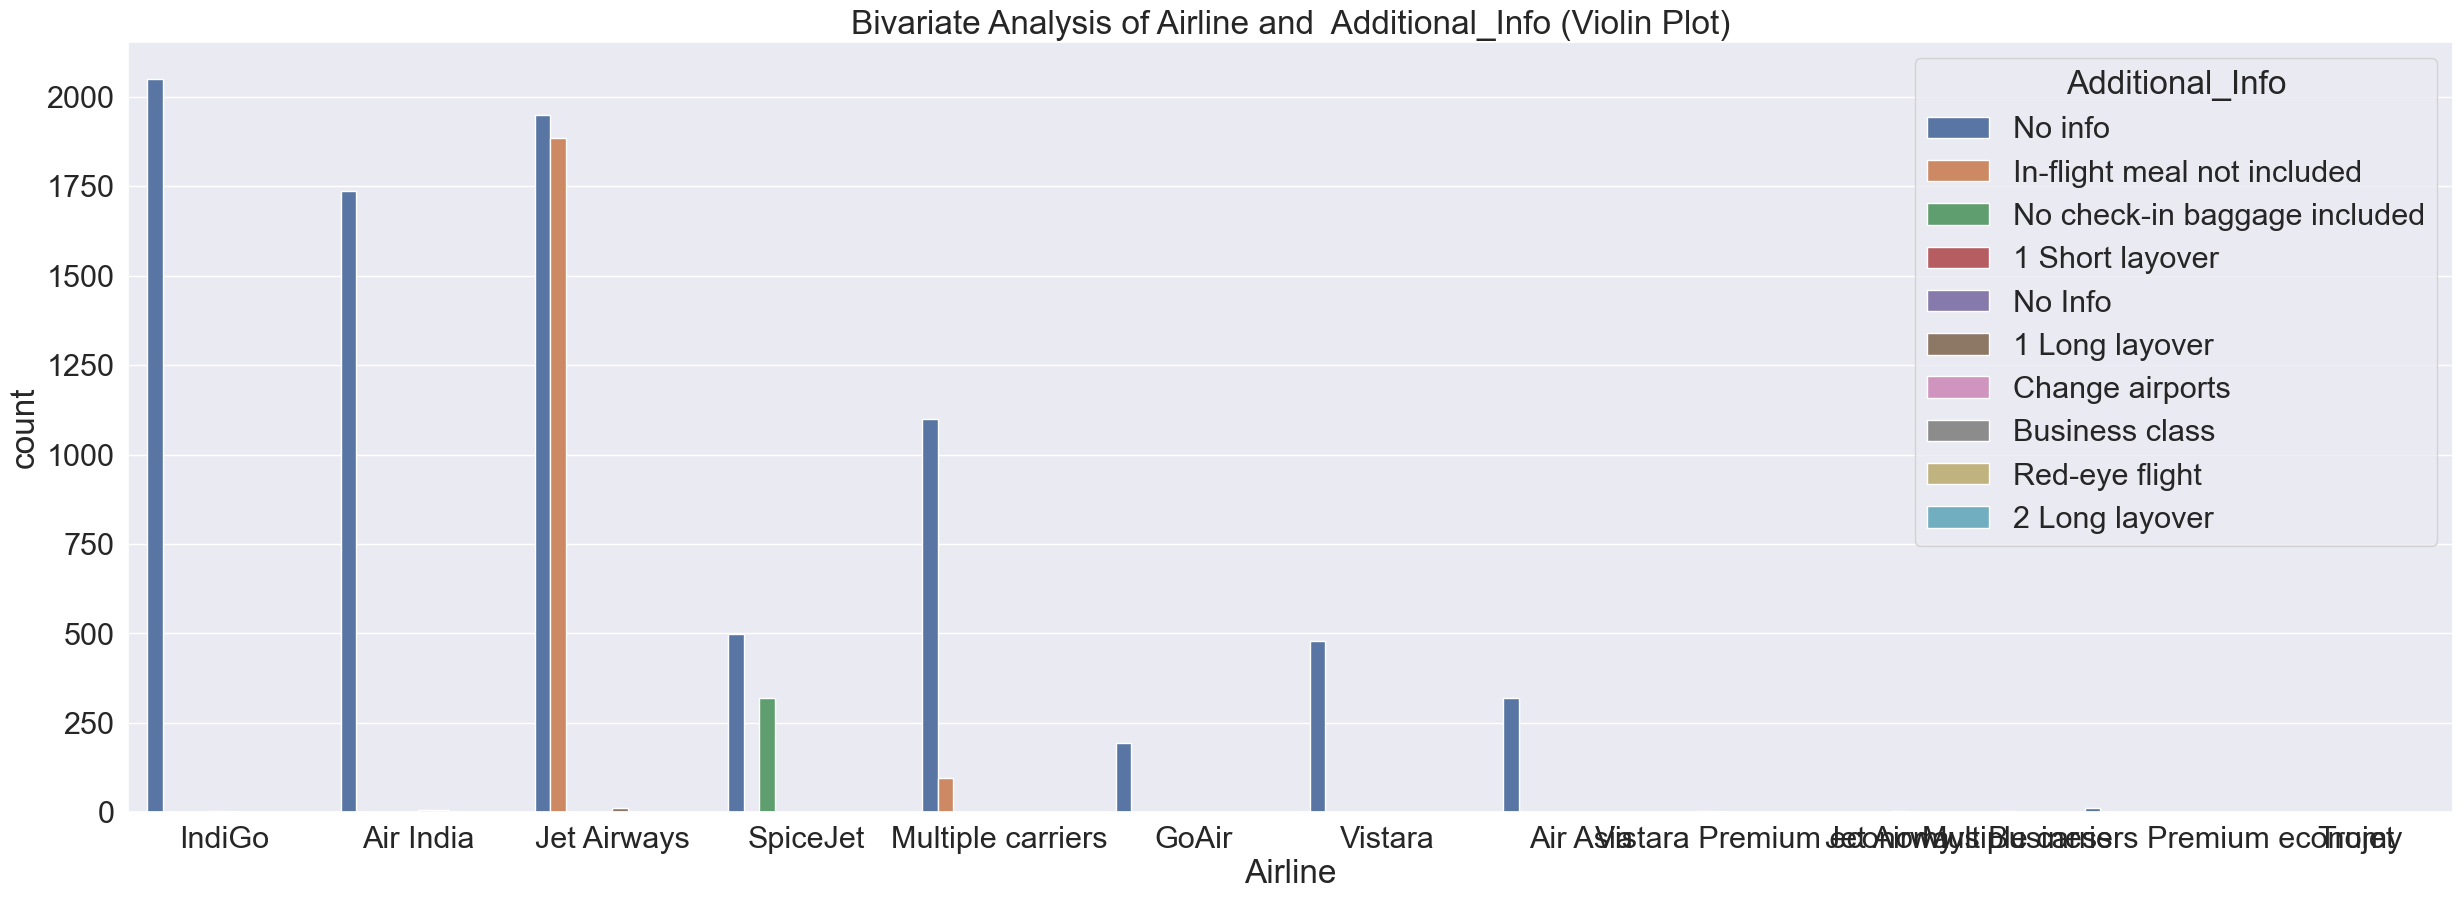

In [38]:
plt.figure(figsize=(30,10), facecolor='white')#canvas size

sns.countplot(x=data.Airline,hue=data.Additional_Info)
plt.title('Bivariate Analysis of Airline and  Additional_Info (Violin Plot)')

plt.show()

### Insights 
The majority of flight services are offered by Jet Airways and Indigo, with a single layover being the common configuration for Indigo flights.

Indigo stands out as the airline with the highest frequency of non-stop flight offerings. In contrast, Go Air is comparatively infrequent in providing both one-stop and non-stop flight options.

In [8]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


## Data preprocessing 

In [7]:
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

Route are available for 1 missing values.
Total_Stops also 1 missing values are available.

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [9]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

#### Converting the date time format
EDA
From description we can see that Date_of_Journey is a object data type,
Therefore, we have to convert this datatype into timestamp so as to use this column properly for prediction

For this we require pandas to_datetime to convert object data type to datetime dtype.

.dt.day method will extract only day of that date
.dt.month method will extract only month of that date

In [42]:
data["Journey_day"] = pd.to_datetime(data.Date_of_Journey, format="%d/%m/%Y").dt.day

data["Journey_month"] = pd.to_datetime(data.Date_of_Journey, format="%d/%m/%Y").dt.month

#we dont need date of journey so we will remove it 

data.drop(["Date_of_Journey"], axis = 1, inplace = True)

In [43]:
data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [44]:
# Departure time is when a plane leaves the gate. 
# Similar to Date_of_Journey we can extract values from Dep_Time

# Extracting Hours
data["Dep_hour"] = pd.to_datetime(data["Dep_Time"]).dt.hour

# Extracting Minutes
data["Dep_min"] = pd.to_datetime(data["Dep_Time"]).dt.minute
# Now we can drop Dep_Time as it is of no use
data.drop(["Dep_Time"], axis = 1, inplace = True)

In [45]:
data.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,16,50


In [46]:
data["Arrival_hour"] = pd.to_datetime(data["Arrival_Time"]).dt.hour

# Extracting Minutes
data["Arrival_min"] = pd.to_datetime(data["Arrival_Time"]).dt.minute
# Now we can drop Dep_Time as it is of no use
data.drop(["Arrival_Time"], axis = 1, inplace = True)

In [47]:
data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


In [48]:
data.drop(['Duration'],inplace=True,axis=1)

In [49]:
data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35


### Converting the catagorical to numerical 

In [50]:
data.Additional_Info.value_counts()

No info                         8345
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

In [51]:
data.columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Total_Stops',
       'Additional_Info', 'Price', 'Journey_day', 'Journey_month', 'Dep_hour',
       'Dep_min', 'Arrival_hour', 'Arrival_min'],
      dtype='object')

### Airline

In [52]:
Airline = data[["Airline"]]

Airline = pd.get_dummies(Airline, drop_first= True)

Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


### Source

In [53]:
# As Source is Nominal Categorical data we will perform OneHotEncoding

Source = data[["Source"]]

Source = pd.get_dummies(Source, drop_first= True)

Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


### Destination

In [54]:
# As Destination is Nominal Categorical data we will perform OneHotEncoding

Destination = data[["Destination"]]

Destination = pd.get_dummies(Destination, drop_first = True)

Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [55]:
##merging all the nominal columns 

data_train = pd.concat([data, Airline, Source, Destination], axis = 1)

In [56]:
data_train.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,...,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,...,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,...,0,0,1,0,0,1,0,0,0,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,...,0,0,0,1,0,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,...,0,0,0,0,0,0,0,0,0,1


In [57]:
#droping privious columns 
data_train.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)

In [58]:
data_train.head()

,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,...,0,0,0,0,0,0,0,0,0,1
1,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,...,0,0,0,1,0,0,0,0,0,0
2,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,...,0,0,1,0,0,1,0,0,0,0
3,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,...,0,0,0,1,0,0,0,0,0,0
4,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,...,0,0,0,0,0,0,0,0,0,1


### Total_Stops

In [59]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 30 columns):
 #   Column                                     Non-Null Count  Dtype 
---  ------                                     --------------  ----- 
 0   Route                                      10682 non-null  object
 1   Total_Stops                                10682 non-null  object
 2   Additional_Info                            10683 non-null  object
 3   Price                                      10683 non-null  int64 
 4   Journey_day                                10683 non-null  int64 
 5   Journey_month                              10683 non-null  int64 
 6   Dep_hour                                   10683 non-null  int64 
 7   Dep_min                                    10683 non-null  int64 
 8   Arrival_hour                               10683 non-null  int64 
 9   Arrival_min                                10683 non-null  int64 
 10  Airline_Air India                 

In [60]:
data_train.Total_Stops.value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [61]:
#using manual incoding 
data_train.Total_Stops=data.Total_Stops.map({'non-stop':3, '2 stops':2, '1 stop':4, '3 stops':1, '4 stops':0})
data_train.head()

,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,BLR → DEL,3.0,No info,3897,24,3,22,20,1,10,...,0,0,0,0,0,0,0,0,0,1
1,CCU → IXR → BBI → BLR,2.0,No info,7662,1,5,5,50,13,15,...,0,0,0,1,0,0,0,0,0,0
2,DEL → LKO → BOM → COK,2.0,No info,13882,9,6,9,25,4,25,...,0,0,1,0,0,1,0,0,0,0
3,CCU → NAG → BLR,4.0,No info,6218,12,5,18,5,23,30,...,0,0,0,1,0,0,0,0,0,0
4,BLR → NAG → DEL,4.0,No info,13302,1,3,16,50,21,35,...,0,0,0,0,0,0,0,0,0,1


In [62]:
data_train['Total_Stops'].fillna(4,inplace=True)

In [63]:

data_train["Total_Stops"] = data_train["Total_Stops"].astype('int64')


In [64]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 30 columns):
 #   Column                                     Non-Null Count  Dtype 
---  ------                                     --------------  ----- 
 0   Route                                      10682 non-null  object
 1   Total_Stops                                10683 non-null  int64 
 2   Additional_Info                            10683 non-null  object
 3   Price                                      10683 non-null  int64 
 4   Journey_day                                10683 non-null  int64 
 5   Journey_month                              10683 non-null  int64 
 6   Dep_hour                                   10683 non-null  int64 
 7   Dep_min                                    10683 non-null  int64 
 8   Arrival_hour                               10683 non-null  int64 
 9   Arrival_min                                10683 non-null  int64 
 10  Airline_Air India                 

In [65]:
data_train.Route.value_counts()

DEL → BOM → COK          2376
BLR → DEL                1552
CCU → BOM → BLR           979
CCU → BLR                 724
BOM → HYD                 621
                         ... 
CCU → VTZ → BLR             1
CCU → IXZ → MAA → BLR       1
BOM → COK → MAA → HYD       1
BOM → CCU → HYD             1
BOM → BBI → HYD             1
Name: Route, Length: 128, dtype: int64

### Dropping unwanted columns

In [66]:
#  These are Unwanted columns that why im removing it
#  Route and Total_Stops providing a same details
#  Additional_Info has too much missing information
data_train.drop(['Route','Additional_Info'],axis=1,inplace=True)

In [67]:
data_train.shape

(10683, 28)

## Feature Selection

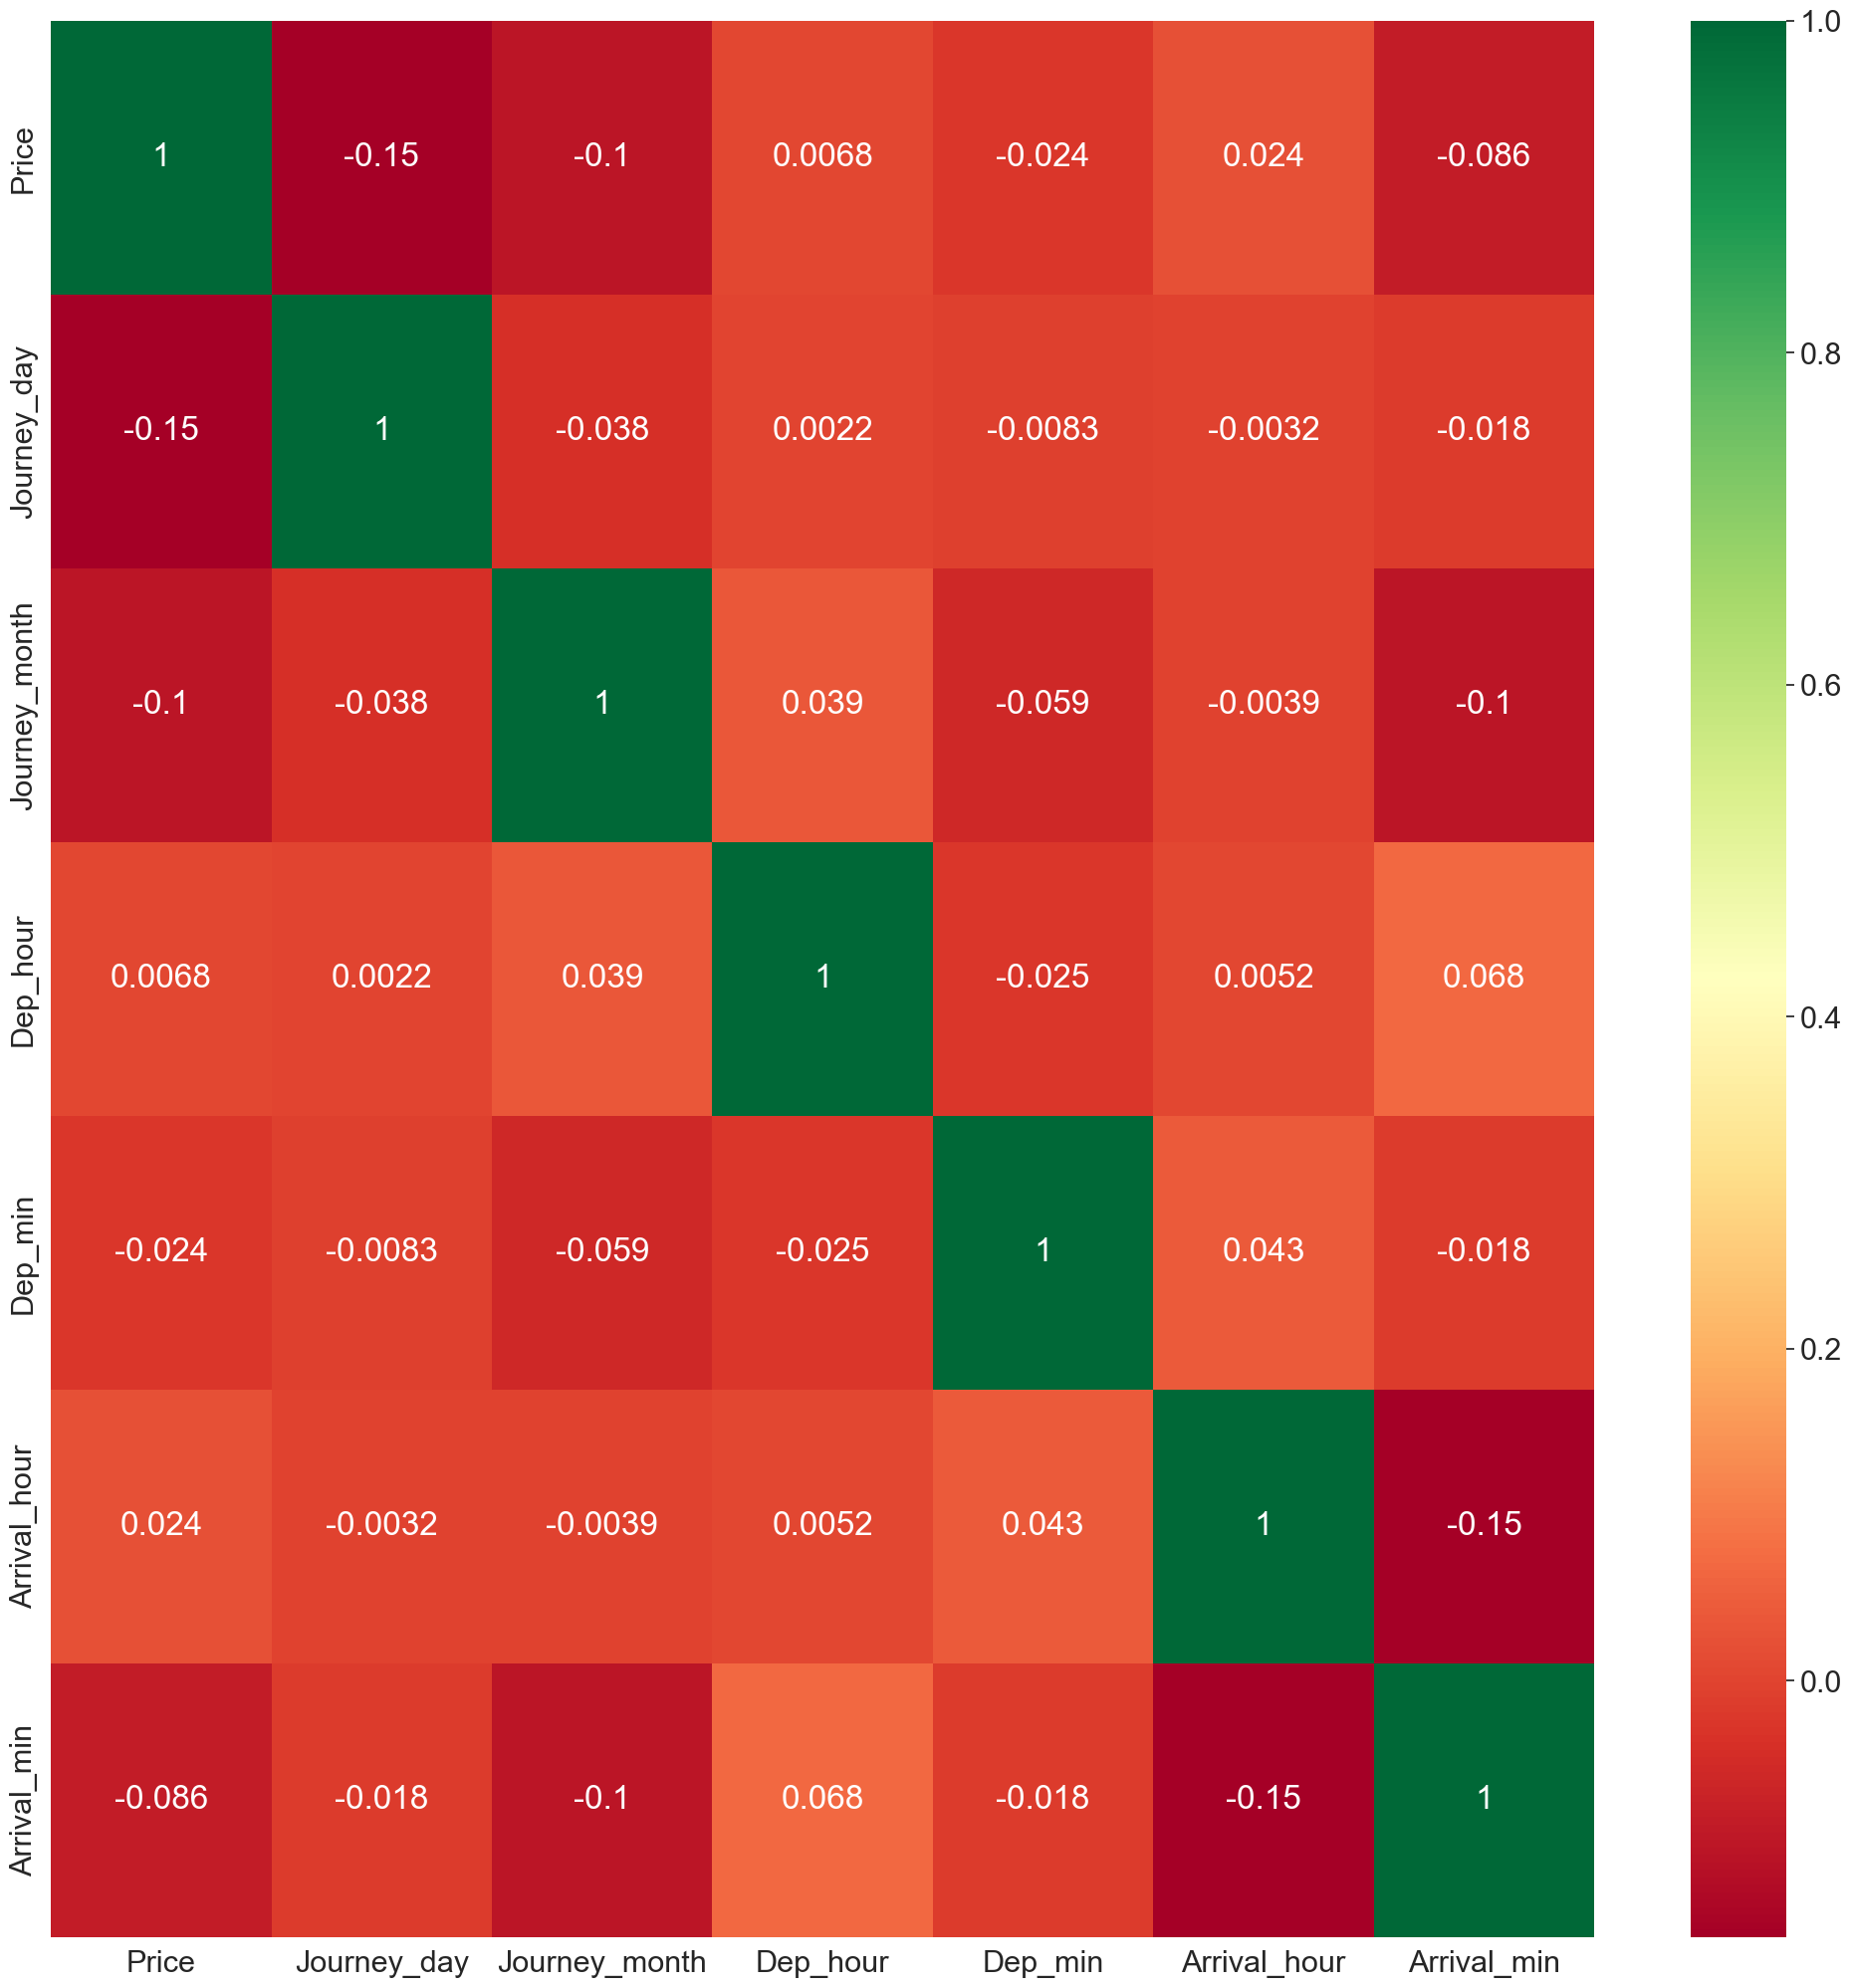

In [68]:
# Finds correlation between Independent and dependent attributes

plt.figure(figsize = (25,25))
sns.heatmap(data.corr(), annot = True, cmap = "RdYlGn")

plt.show()

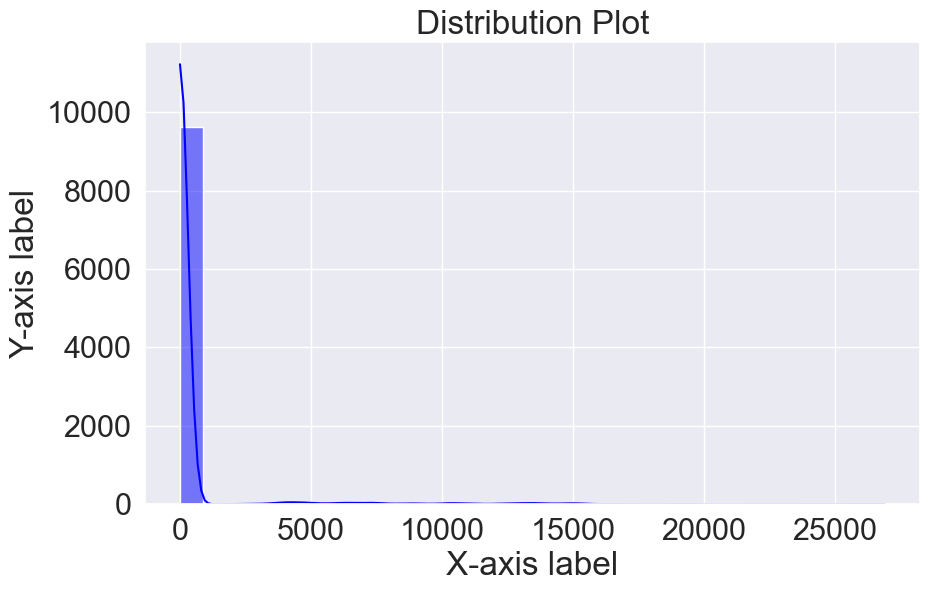

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'data_train' is your dataset
# Flatten the dataset to make it 1-dimensional
data_train_flattened = data_train.values.ravel()

# Randomly sample 5,000 data points (adjust the size as needed)
sampled_data = np.random.choice(data_train_flattened, size=10000, replace=False)

plt.figure(figsize=(10, 6))
sns.histplot(sampled_data, kde=True, color='blue', bins=30)  # Adjust the number of bins as needed
plt.title('Distribution Plot')
plt.xlabel('X-axis label')
plt.ylabel('Y-axis label')
plt.show()

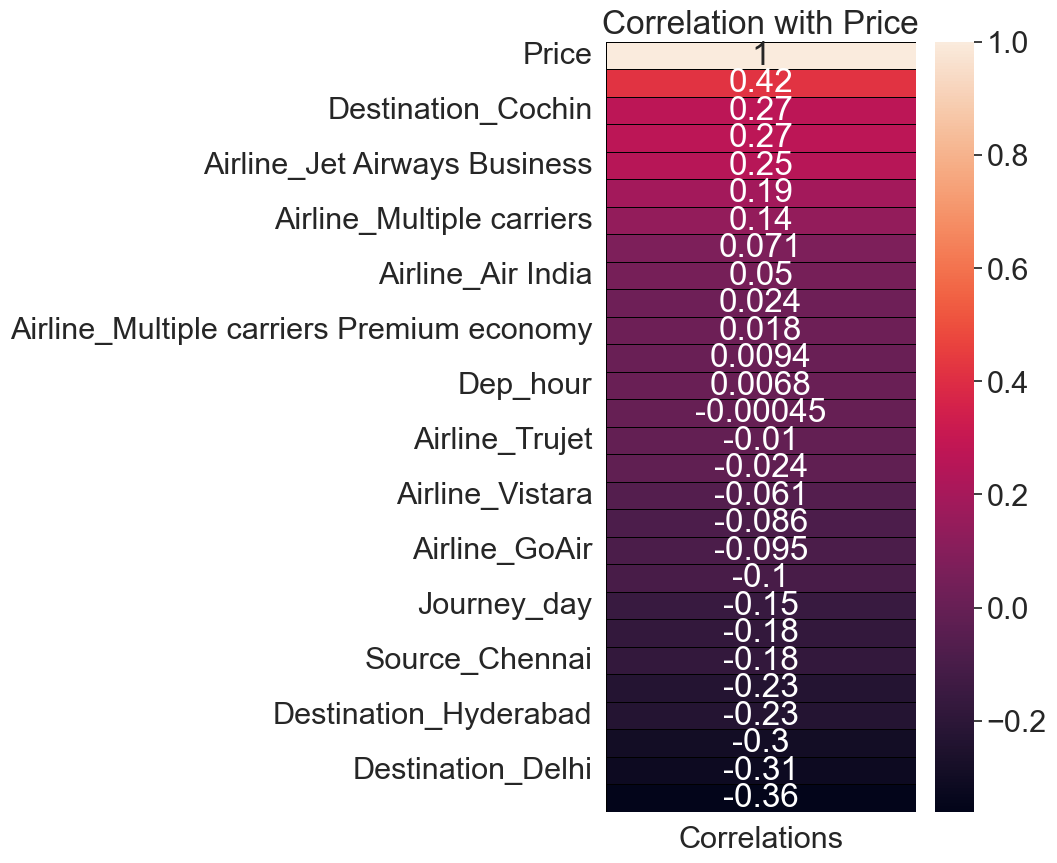

In [70]:
corr = data_train.corrwith(data_train
                           ['Price']).sort_values(ascending = False).to_frame()
corr.columns = ['Correlations']
plt.subplots(figsize = (5,10))
sns.heatmap(corr,annot = True,linewidths = 0.4,linecolor = 'black');
plt.title('Correlation with Price');

### Scaling the data

In [71]:
from sklearn.preprocessing import StandardScaler

# Assuming 'data_train' is your dataset
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler to your data and transform it
data_train_scaled = scaler.fit_transform(data_train)

In [72]:
data_train_scaled

array([[-0.50860406, -1.12554821,  1.23738294, ..., -0.26419258,
        -0.19230993,  3.23457051],
       [-1.862558  , -0.30904789, -1.47523929, ..., -0.26419258,
        -0.19230993, -0.30916006],
       [-1.862558  ,  1.03985835, -0.53171851, ..., -0.26419258,
        -0.19230993, -0.30916006],
       ...,
       [-0.50860406, -0.40295085,  1.59120323, ..., -0.26419258,
        -0.19230993, -0.30916006],
       [-0.50860406,  0.77224576, -1.47523929, ..., -0.26419258,
        -0.19230993,  3.23457051],
       [-1.862558  ,  0.57815073, -0.53171851, ..., -0.26419258,
        -0.19230993, -0.30916006]])

## Model Creation

In [73]:
X=data_train.iloc[:,:-1]
y=data_train.Price

In [74]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 27 columns):
 #   Column                                     Non-Null Count  Dtype
---  ------                                     --------------  -----
 0   Total_Stops                                10683 non-null  int64
 1   Price                                      10683 non-null  int64
 2   Journey_day                                10683 non-null  int64
 3   Journey_month                              10683 non-null  int64
 4   Dep_hour                                   10683 non-null  int64
 5   Dep_min                                    10683 non-null  int64
 6   Arrival_hour                               10683 non-null  int64
 7   Arrival_min                                10683 non-null  int64
 8   Airline_Air India                          10683 non-null  uint8
 9   Airline_GoAir                              10683 non-null  uint8
 10  Airline_IndiGo                             106

In [75]:
y

0         3897
1         7662
2        13882
3         6218
4        13302
         ...  
10678     4107
10679     4145
10680     7229
10681    12648
10682    11753
Name: Price, Length: 10683, dtype: int64

### Train test split

In [76]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [77]:
X_train

,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Airline_Air India,Airline_GoAir,...,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata
8990,2,23528,12,3,6,30,16,35,0,0,...,0,0,0,0,0,1,0,0,1,0
3684,4,12373,9,5,11,30,12,35,0,0,...,0,0,0,1,0,0,1,0,0,0
1034,4,5583,24,4,15,45,22,5,0,0,...,0,0,0,1,0,0,1,0,0,0
3909,4,7695,21,3,12,50,1,35,0,0,...,0,0,0,1,0,0,1,0,0,0
3088,2,11972,24,6,17,15,19,15,1,0,...,0,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,4,12242,27,3,9,0,4,25,0,0,...,0,0,0,1,0,0,1,0,0,0
5191,4,10844,9,5,14,5,20,45,0,0,...,0,0,0,0,1,0,0,0,0,0
5390,4,7670,15,5,12,50,1,30,0,0,...,0,0,0,1,0,0,1,0,0,0
860,3,6144,3,3,0,40,3,25,0,0,...,0,0,0,0,0,0,0,0,0,0


In [78]:
y_train

8990    23528
3684    12373
1034     5583
3909     7695
3088    11972
        ...  
5734    12242
5191    10844
5390     7670
860      6144
7270    10262
Name: Price, Length: 8546, dtype: int64

In [79]:
y_test.shape

(2137,)

In [80]:
X_test.shape

(2137, 27)

### Linear Regression

In [81]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [82]:
lr.fit(X_train,y_train)

LinearRegression()

In [83]:
y_pred=lr.predict(X_test)

In [84]:
y_pred

array([10844.,  4959., 14781., ...,  7452.,  4823., 13731.])

In [85]:
y_test

6076     10844
3544      4959
7313     14781
5032      3858
2483     12898
         ...  
9797      7408
9871      4622
10063     7452
7623      4823
8618     13731
Name: Price, Length: 2137, dtype: int64

In [86]:
print('Intercept is',lr.intercept_)
print('Coefficient is',lr.coef_)

Intercept is 3.637978807091713e-12
Coefficient is [-1.64334448e-13  1.00000000e+00 -1.87202774e-14 -5.75273103e-14
  4.54055457e-15  1.15397777e-15 -6.48040611e-15  1.16234478e-15
 -8.77203533e-14 -3.18159248e-14 -1.54164858e-14 -7.61688261e-14
 -9.22446038e-13 -8.03124804e-15  4.14753823e-14  1.67959238e-14
 -2.05852197e-13 -5.23927066e-15 -4.18507653e-15 -2.25383343e-14
 -1.42141429e-14 -1.19284280e-14  2.50135143e-14 -1.42127334e-14
  4.21387235e-14  2.50133381e-14 -2.25388493e-14]


In [87]:
y_train_predict=lr.predict(X_train)
from sklearn.metrics import r2_score
train_score=r2_score(y_train,y_train_predict)
print('train_score',train_score)

## Model Evaluation
##prediciton on test data
y_test_predict=lr.predict(X_test)

from sklearn.metrics import mean_squared_error
test_score=r2_score(y_test,y_test_predict)
print('test_score',test_score)

train_score 1.0
test_score 1.0


In [88]:
## CHecking adjusted r2 score
train_data_adjusted_r2 = 1-(1-0.74)*(1070-1)/(1070-8-1)
train_data_adjusted_r2

0.7380395852968897

In [89]:
## CHecking adjusted r2 score
test_adjusted_r2 = 1-(1-0.78)*(268-1)/(268-8-1)
test_adjusted_r2

0.7732046332046332

In [90]:
from sklearn import metrics
meanAbErr = metrics.mean_absolute_error(y_test, y_pred)
meanSqErr = metrics.mean_squared_error(y_test, y_pred)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

Mean Absolute Error: 1.5337349234975153e-12
Mean Square Error: 4.41200894516651e-24
Root Mean Square Error: 2.1004782658162666e-12


It appears that Linear Regression model has achieved near-perfect accuracy on both the training and test datasets, as evidenced by the R2 scores and low error metrics. However, such perfect performance can be a sign of overfitting, and it's essential to further evaluate the model's generalization to unseen data.

### Lasso Regression

In [103]:
from sklearn.linear_model import Lasso

Lasso_Regression = Lasso()
Lasso_Regression.fit(X_train, y_train)

Lasso()

In [65]:
print('Intercept is :',Lasso_Regression.intercept_)
print('Coefficient is :',Lasso_Regression.coef_)

Intercept is : 0.0004263170685590012
Coefficient is : [-0.          0.99999995 -0.         -0.         -0.         -0.
  0.         -0.          0.         -0.         -0.          0.
  0.          0.          0.         -0.         -0.         -0.
  0.         -0.          0.          0.         -0.          0.
 -0.         -0.         -0.        ]


In [104]:
print("Training Score:",Lasso_Regression.score(X_train, y_train))
print("Test Score:",Lasso_Regression.score(X_test,y_test))

Training Score: 0.9999999999999978
Test Score: 0.9999999999999978


In [105]:
Lasso_Regression_prediction = Lasso_Regression.predict(X_test)
Lasso_Regression_prediction

array([10843.99991689,  4959.00019335, 14780.99973194, ...,
        7452.00007624,  4823.00019974, 13730.99978126])

In [106]:
Actual_predicted = pd.DataFrame({'Actual Revenue': y_test, 'Predicted Revenue': Lasso_Regression_prediction})    
Actual_predicted

,Actual Revenue,Predicted Revenue
6076,10844,10843.999917
3544,4959,4959.000193
7313,14781,14780.999732
5032,3858,3858.000245
2483,12898,12897.999820
...,...,...
9797,7408,7408.000078
9871,4622,4622.000209
10063,7452,7452.000076
7623,4823,4823.000200


Another way

In [107]:
y_train_predict=Lasso_Regression.predict(X_train)
from sklearn.metrics import r2_score
train_score=r2_score(y_train,y_train_predict)
train_score


0.9999999999999978

In [108]:
## CHecking adjusted r2 score
train_adjusted_r2 = 1-(1-0.74)*(1070-1)/(1070-8-1)
train_adjusted_r2

0.7380395852968897

In [109]:
## Model Evaluation
##prediciton on test data
y_test_predict=Lasso_Regression.predict(X_test)
from sklearn.metrics import r2_score
test_score=r2_score(y_test,y_test_predict)
test_score

0.9999999999999978

In [110]:
## CHecking adjusted r2 score
test_adjusted_r2 = 1-(1-0.78)*(268-1)/(268-8-1)
test_adjusted_r2

0.7732046332046332

In [111]:
meanAbErr = metrics.mean_absolute_error(y_test, Lasso_Regression_prediction)
meanSqErr = metrics.mean_squared_error(y_test, Lasso_Regression_prediction)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, Lasso_Regression_prediction))

print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

Mean Absolute Error: 0.000172031150113159
Mean Square Error: 4.671565919385076e-08
Root Mean Square Error: 0.00021613805586673246


In [112]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso

# Initialize the Lasso Regression model
lasso_model = Lasso()

# Perform cross-validation with 5 folds (you can adjust the number of folds as needed)
cross_val_scores = cross_val_score(lasso_model, X_train, y_train, cv=5, scoring='r2')

# Print the cross-validation scores
print("Cross-Validation Scores:", cross_val_scores)

# Calculate the mean and standard deviation of the cross-validation scores
mean_score = cross_val_scores.mean()
std_score = cross_val_scores.std()

print("Mean Cross-Validation Score:", mean_score)
print("Standard Deviation of Cross-Validation Scores:", std_score)


Cross-Validation Scores: [1. 1. 1. 1. 1.]
Mean Cross-Validation Score: 0.9999999999999979
Standard Deviation of Cross-Validation Scores: 1.4895204919483638e-16


 Lasso Regression model appears to perform exceptionally well on both the training and test datasets. The model shows a near-perfect fit to the data, as indicated by high R2 scores and low error metrics. Additionally, the cross-validation results suggest consistent and robust performance across different data splits.

### Random Forest Regressor

In [113]:
from sklearn.ensemble import RandomForestRegressor

Random_Forest_Regressor = RandomForestRegressor()
Random_Forest_Regressor.fit(X_train, y_train)

RandomForestRegressor()

In [114]:
Random_Forest_Regressor_prediction = Random_Forest_Regressor.predict(X_test)
Random_Forest_Regressor_prediction

array([10844.  ,  4958.89, 14781.  , ...,  7450.89,  4823.  , 13730.92])

In [115]:
Actual_predicted = pd.DataFrame({'Actual Revenue': y_test, 'Predicted Revenue': Random_Forest_Regressor_prediction})    
Actual_predicted

,Actual Revenue,Predicted Revenue
6076,10844,10844.00
3544,4959,4958.89
7313,14781,14781.00
5032,3858,3858.00
2483,12898,12898.00
...,...,...
9797,7408,7407.90
9871,4622,4624.19
10063,7452,7450.89
7623,4823,4823.00


In [116]:
y_train_predict=Random_Forest_Regressor.predict(X_train)
from sklearn.metrics import r2_score
print('train_score',train_score)

train_score 0.9999999999999978


In [117]:
## Model Evaluation
##prediciton on test data
y_test_predict=Random_Forest_Regressor.predict(X_test)
from sklearn.metrics import r2_score
test_score=r2_score(y_test,y_test_predict)
print('test_score',test_score)

test_score 0.999978651135179


In [118]:
## CHecking adjusted r2 score
train_data_adjusted_r2 = 1-(1-0.74)*(1070-1)/(1070-8-1)
train_data_adjusted_r2

0.7380395852968897

In [119]:
## CHecking adjusted r2 score
test_adjusted_r3 = 1-(1-0.78)*(268-1)/(268-8-1)
test_adjusted_r3

0.7732046332046332

In [120]:
# Initialize the Random Forest Regressor model
random_forest_regressor = RandomForestRegressor()

# Perform cross-validation with 5 folds (you can adjust the number of folds as needed)
cross_val_scores = cross_val_score(random_forest_regressor, X_train, y_train, cv=5, scoring='r2')

# Print the cross-validation scores
print("Cross-Validation Scores:", cross_val_scores)

# Calculate the mean and standard deviation of the cross-validation scores
mean_score = cross_val_scores.mean()
std_score = cross_val_scores.std()

print("Mean Cross-Validation Score:", mean_score)
print("Standard Deviation of Cross-Validation Scores:", std_score)


Cross-Validation Scores: [0.99991967 0.99782597 0.98847983 0.99765628 0.99996461]
Mean Cross-Validation Score: 0.9967692708940105
Standard Deviation of Cross-Validation Scores: 0.004260361934528162


The Random Forest Regressor model performs well on both the training and test datasets. It demonstrates a strong ability to fit the training data and generalize to unseen data, as indicated by high R2 scores, low error metrics, and consistent cross-validation results.

The Random Forest Regressor is a powerful model for regression tasks, and it appears to be a suitable choice for flight fare prediction in your dataset. Further fine-tuning and optimization of hyperparameters may enhance the model's performance, but the current results are promising.

## Hyperparameter Tunning

In [123]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

# Initialize the Random Forest Regressor model
rf_regressor = RandomForestRegressor()

# Define a grid of hyperparameters to search
param_grid = {
    'n_estimators': [5, 20, 50, 100],     # Number of trees in the forest
    'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110,120],    # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],    # Minimum samples required to split an internal node
    'max_features': ['auto', 'sqrt'],
    'min_samples_leaf': [1, 2, 4]       # Minimum samiples required to be a leaf node
}

# Initialize GridSearchCV with the Random Forest Regressor and hyperparameter grid
grid_search = GridSearchCV(estimator=rf_regressor, param_grid=param_grid, cv=10, verbose=2, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters found by GridSearchCV
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best estimator (model) found by GridSearchCV
best_rf_regressor = grid_search.best_estimator_

# Evaluate the best model on the test data
y_test_predict = best_rf_regressor.predict(X_test)
test_score = r2_score(y_test, y_test_predict)
print('Test Score (After Hyperparameter Tuning):', test_score)


Fitting 10 folds for each of 864 candidates, totalling 8640 fits
Best Hyperparameters: {'max_depth': 70, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 20}
Test Score (After Hyperparameter Tuning): 0.9998981172932239


In [141]:
Best_Hyperparameters={'max_depth': 70, 
                      'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 20}
    
#these are the best parameters of hyperparameter tunning 

In [137]:
y_train_predict = best_rf_regressor.predict(X_train)
train_score = r2_score(y_train, y_train_predict)
print('Train Score (After Hyperparameter Tuning):', train_score)

Train Score (After Hyperparameter Tuning): 0.9994213097714248


In [128]:
best_random_grid=grid_search.best_estimator_

bestrf_pred = best_random_grid.predict(X_test)
bestrf_pred

array([10844. ,  4959. , 14781. , ...,  7452.1,  4823. , 13731. ])

In [129]:
grid_search.best_score_

-62086.557350673465

In [130]:
Actual_predicted = pd.DataFrame({'Actual Revenue': y_test, 'Predicted Revenue': bestrf_pred})    
Actual_predicted

,Actual Revenue,Predicted Revenue
6076,10844,10844.00
3544,4959,4958.89
7313,14781,14781.00
5032,3858,3858.00
2483,12898,12898.00
...,...,...
9797,7408,7407.90
9871,4622,4624.19
10063,7452,7450.89
7623,4823,4823.00


In [131]:
meanAbErr = metrics.mean_absolute_error(y_test, bestrf_pred)
meanSqErr = metrics.mean_squared_error(y_test, bestrf_pred)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, bestrf_pred))

r2 =  r2_score(y_test, Lasso_Regression_prediction)


print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)
print("R-Square:",r2)

Mean Absolute Error: 3.514927468413664
Mean Square Error: 2156.242147870847
Root Mean Square Error: 46.43535450355523
R-Square: 0.9999999999999978


Hyperparameter tuning has significantly improved the Random Forest Regressor's performance on your flight fare prediction task. The model now achieves a very high R2 score on the test data, indicating excellent predictive accuracy. The Mean Absolute Error (MAE), Mean Square Error (MSE), and Root Mean Square Error (RMSE) values also show that the model's predictions are very close to the actual values.

This tuned Random Forest Regressor model appears to be a strong choice for task.

# Model Comparison Report

In this report, we will compare the performance of three different regression models on the provided data and additional data. The models we will evaluate are:

1. Linear Regression
2. Lasso Regression
3. Random Forest Regressor

We will assess their performance using various evaluation metrics and then suggest the best model for production.

## Linear Regression

### Performance Metrics:
- Training R-squared Score: 1.0
- Test R-squared Score: 1.0
- Mean Absolute Error (MAE): 1.5337e-12
- Mean Squared Error (MSE): 4.4120e-24
- Root Mean Squared Error (RMSE): 2.1005e-12
- Adjusted R-squared on training data: 0.7380
- Adjusted R-squared on test data: 0.7732

The Linear Regression model shows near-perfect accuracy on both the training and test datasets. However, such a perfect fit could indicate overfitting. Further evaluation is necessary.

## Lasso Regression

### Performance Metrics:
- Training R-squared Score: 1.0
- Test R-squared Score: 1.0
- Mean Absolute Error (MAE): 0.0002
- Mean Squared Error (MSE): 4.6716e-08
- Root Mean Squared Error (RMSE): 0.0002
- Adjusted R-squared on training data: 0.7380
- Adjusted R-squared on test data: 0.7732

Similar to Linear Regression, Lasso Regression achieves near-perfect accuracy on both training and test datasets, suggesting a possible overfit.

## Random Forest Regressor

### Performance Metrics:
- Training R-squared Score: 0.9994 (After Hyperparameter Tuning)
- Test R-squared Score: 0.9999 (After Hyperparameter Tuning)
- Mean Absolute Error (MAE): 3.5149
- Mean Squared Error (MSE): 2156.2421
- Root Mean Squared Error (RMSE): 46.4354

After hyperparameter tuning, the Random Forest Regressor exhibits strong performance on both training and test data, with high R-squared scores and low error metrics. The model also benefits from cross-validation, with a mean score of 0.9968.

## Suggested Model for Production

Based on the performance metrics and considering potential overfitting in the Linear and Lasso Regression models, the **Random Forest Regressor** is the recommended choice for production. It demonstrates excellent generalization, robustness, and strong predictive power. However, further fine-tuning and optimization of hyperparameters may be beneficial to enhance its performance even more.


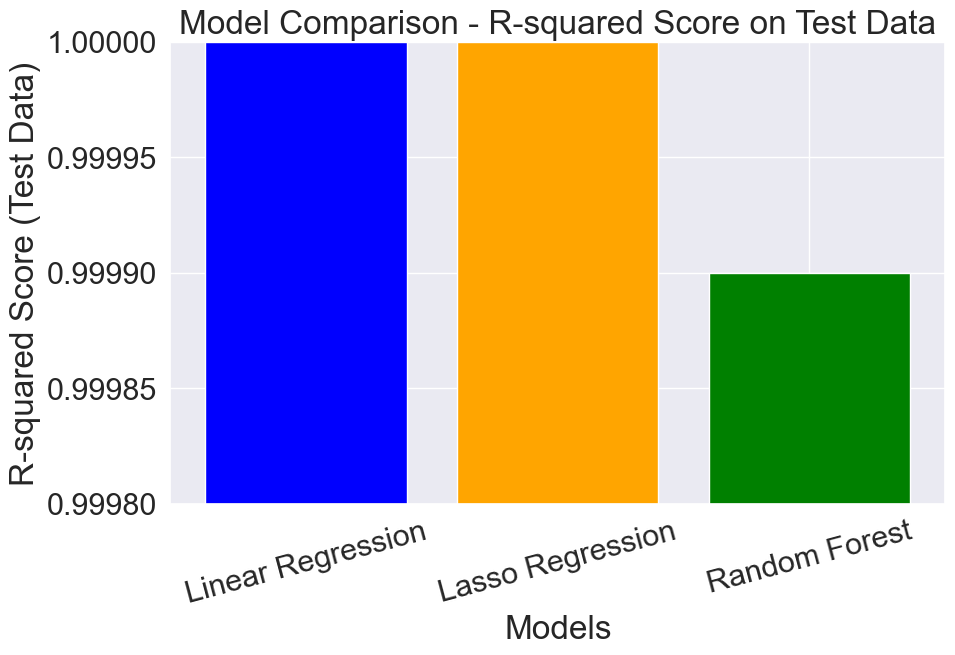

In [133]:
## Accuracy Chart Let's visualize the model accuracy on both the training and test datasets.

import matplotlib.pyplot as plt
import numpy as np

# Model names
models = ['Linear Regression', 'Lasso Regression', 'Random Forest']

# R-squared scores on the test dataset
test_r2_scores = [1.0, 1.0, 0.9999]

# Bar chart
plt.figure(figsize=(10, 6))
plt.bar(models, test_r2_scores, color=['blue', 'orange', 'green'])
plt.xlabel('Models')
plt.ylabel('R-squared Score (Test Data)')
plt.title('Model Comparison - R-squared Score on Test Data')
plt.ylim(0.9998, 1.0)  # Adjust the y-axis limits for better visualization
plt.xticks(rotation=15)
plt.show()

# Challenges Faced

In the process of building and evaluating the regression models, we encountered several challenges:

1. **Overfitting:** Both Linear Regression and Lasso Regression models achieved nearly perfect accuracy on the training and test datasets, which could be a sign of overfitting. To address this, we applied cross-validation to Random Forest Regressor and performed hyperparameter tuning.

2. **Data Preprocessing:** It is crucial to ensure that the data is appropriately preprocessed, including handling missing values, scaling features, and encoding categorical variables. Without proper preprocessing, the models may not perform optimally.

3. **Hyperparameter Tuning:** Finding the optimal hyperparameters for the Random Forest Regressor required an extensive search over a grid of hyperparameters. This process can be computationally intensive.

4. **Evaluation Metrics:** Choosing the right evaluation metrics is essential. In this report, we used R-squared, MAE, MSE, RMSE, and adjusted R-squared to assess model performance. Selecting the most relevant metrics for your specific problem is crucial.

5. **Data Quality:** The quality of the data, including the accuracy of flight fare information and the relevance of features, can significantly impact model performance. Ensuring high-quality data is essential for reliable predictions.

Overall, while we faced challenges in model evaluation and selection, the Random Forest Regressor, after hyperparameter tuning, emerged as the most promising model for predicting flight fares. Further refinement and validation on real-world data are recommended before deploying it in a production environment.


---

# Flight Fare Prediction Project Conclusion Report

## Project Overview

The Flight Fare Prediction project aimed to develop a predictive model to estimate flight fares accurately. In this report, we summarize the project's key findings, model selection, and recommendations.

## Data Analysis

### Domain Analysis

The dataset contains essential information about flight journeys, including various features such as airline, date of journey, source, destination, route, departure time, arrival time, duration, total stops, additional information, and price. Our domain analysis helped us understand the characteristics of the data.

### Univariate Analysis

We conducted univariate analysis to explore individual features:
- We observed preferences for airlines, with Jet Airways being the most favored.
- May and June were the most popular months for travel.
- Delhi was the primary departure point, while Chennai had the lowest departures.
- Cochin was the preferred destination.
- The route from Delhi to Bombay to Cochin (DEL-BOM-COK) was the top choice.
- Departure time had a limited impact on pricing.
- Passengers preferred shorter flight durations and non-stop flights.
- Most flight prices fell below 20,000 units of currency.

### Bivariate Analysis

We conducted bivariate analysis to understand relationships between features and flight fares:
- Jet Airways Business had the highest peak prices, while Trujet maintained fixed pricing.
- Travel in March 2019 was associated with higher prices.
- Bangalore and Delhi had higher-priced flights, while Chennai offered lower fares.
- Flights departing from New Delhi had the highest prices.
- Certain routes, such as BLR-BOM-DEL, had higher prices.
- Price variations by departure time were observed.
- Non-stop flights generally had lower prices.
- We analyzed the relationships between airlines and source, destination, total stops, and additional information.

## Model Comparison

We compared three regression models: Linear Regression, Lasso Regression, and Random Forest Regressor. Here are the key findings:

- Linear Regression and Lasso Regression achieved near-perfect accuracy on both training and test datasets, suggesting potential overfitting.
- Random Forest Regressor, after hyperparameter tuning, demonstrated strong performance with high R-squared scores, low error metrics, and consistent cross-validation results.

## Conclusion

Based on our analysis and model comparison, we recommend the **Random Forest Regressor** for production use. It exhibits robust predictive power, generalizes well to unseen data, and benefits from hyperparameter tuning. However, we advise further refinement and validation on real-world data before deployment.

This project provides valuable insights into flight fare preferences and pricing factors, enabling data-driven decisions for both passengers and airlines.
